<a href="https://colab.research.google.com/github/ratmcu/wiki_ner/blob/master/wiki_conll_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install wget
import os
import wget
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
try:
    import colabimport
except:
    colabimporturl = 'https://github.com/ratmcu/colaboratory_import/raw/master/colabimport.py'
    filename = colabimporturl.split("/")[-1].split("?")[0]
    if os.path.isfile(filename):
        os.remove(filename)
    wget.download(colabimporturl)
    import colabimport
    
colabimport.get_notebook('https://github.com/ratmcu/wiki_ner/blob/master/conll_tagged_ne.ipynb?raw=true')
from conll_tagged_ne import WikiConLLTagger
class HashableTupleAnnotations(tuple):
    def __hash__(self):
        return hash(tuple(sorted([self[0:1],self[1:2]])))
class hashabledict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")
import re
!pip install pyahocorasick
!pip install fuzzyset
from ahocorasick import Automaton
import fuzzyset
from operator import itemgetter, attrgetter
import pandas as pd
import pickle
import urllib
from bs4 import BeautifulSoup
import numpy as np
import json

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=25c0119e4f44916fbdbae0a5f4c2d10e310d9aa6f76eaf84864d8daed357af45
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
importing Jupyter notebook from conll_tagged_ne.ipynb
importing Jupyter notebook from reusable_annotator.ipynb
     |████████████████████████████████| 317kB 5.0MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81706 sha256=9911a47757d5e1e6d8b11aba5f16563d0574cfa350594b913f01734d29f5be10
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick
     |████████████████████████████████| 378kB 4.9MB/s 
     |████████████████████████████████| 51kB 17.9MB/s 
  Created wheel for fuzzyset: filename=fuzzyset-0.0.19-cp36-cp36m-linux_x86_64.whl size=167556 sha256=b09b4c0e11eda2b07e93703df11a456c

In [0]:
#experiment_code
# tagger = WikiConLLTagger('https://en.wikipedia.org/wiki/Barack_Obama')
tagger = WikiConLLTagger('https://en.wikipedia.org/wiki/Donald_Trump')
# print(tagger.get_metadata())
# with open('meta_data.pkl', 'wb') as f:
#     pickle.dump(tagger.get_metadata(), f)

info card is scraped successfully


In [0]:
#experiment_code
df = pd.DataFrame(data = tagger.place_tags())
df.to_csv(r'conll_annot.csv', index = None, header=True)

[['Born', 'PERSON'], ['Donald John Trump']]
[['Born', 'DATE'], ['1946-06-14', 'June 14, 1946']]
[['Born', 'GPE'], ['New York City', 'Queens']]
[['Children', 'PERSON'], ['Donald Jr.', 'Ivanka', 'Eric', 'Tiffany', 'Barron']]
[['Spouse(s)', 'PERSON'], ['Ivana Zelníčková', 'Marla Maples', 'Melania Knauss']]
[['Parents', 'PERSON'], ['Fred Trump', 'Mary Anne MacLeod']]
[['Education', 'ORG'], ['The Wharton School']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Donald Jr.', 'CH', (1303, 1305))
DEBUG:root:('Ivanka', 'CH', (1310, 1311))
DEBUG:root:('Eric', 'CH', (1317, 1318))
DEBUG:root:('Ivana', 'CH', (1328, 1329))
DEBUG:root:('Tiffany', 'CH', (1366, 1367))
DEBUG:root:('Barron', 'CH', (1405, 1406))
DEBUG:root:('John Barron"', 'CH', (2340, 2343))
DEBUG:root:('Ivana', 'CH', (3515, 3516))
DEBUG:root:('Donald Jr.', 'CH', (5738, 5740))
DEBUG:root:('Eric', 'CH', (5741, 5742))
DEBUG:root:('Ivanka', 'CH', (5744, 5745))
DEBUG:root:('Donald Trump', 'CH', (6805, 6807))
DEBUG:root:('Eric', 'CH', (10637, 10638))
DEBUG:root:('Ivanka', 'CH', (10643, 10644))
DEBUG:root:('Donald Trump', 'CH', (18544, 18546))
DEBUG:root:('Barr', 'CH', (18739, 18740))
DEBUG:root:('Barr', 'CH', (18788, 18789))
DEBUG:root:('Barr', 'CH', (18848, 18849))
DEBUG:root:('Barr', 'CH', (18877, 18878))
DEBUG:root:

In [0]:
wget.download('https://github.com/ratmcu/wiki_ner/blob/master/president_list.pkl?raw=true')
category = 'politicians'

## pipeline this to accomodate other categories

with open('president_list.pkl', 'rb') as f:
    prsdnt_list = pickle.load(f)
print(prsdnt_list)
for cntry in prsdnt_list:
    for prsdnt in cntry['presidents']:
        if cntry['country'] and prsdnt['name']:
            path = 'dataset' + '/' + category + '/' + cntry['country'] + '/' +  prsdnt['name']
        else:
            continue
        if not os.path.exists(path):
            os.makedirs(path)
        else:
            continue
        try:
            tagger = WikiConLLTagger(prsdnt['url'])
            df = pd.DataFrame(data = tagger.place_tags())
            df.to_csv(r'{0}/conll_tagged.csv'.format(path), index = None, header=True)
        except:
            print("failed to annotate the page!")
            print(prsdnt['url'])
            
import tarfile
tar =  tarfile.open('dataset.tar.gz', mode='w:gz')
tar.add('dataset')
tar.close()    


[{'country': 'United Nations System', 'url': 'https://en.wikipedia.org/wiki/United_Nations_System', 'presidents': []}, {'country': 'Member states of the United Nations', 'url': 'https://en.wikipedia.org/wiki/Member_states_of_the_United_Nations', 'presidents': []}, {'country': 'Afghanistan', 'url': 'https://en.wikipedia.org/wiki/Afghanistan', 'presidents': [{'name': 'Ashraf Ghani', 'url': 'https://en.wikipedia.org/wiki/Ashraf_Ghani'}, {'name': 'Hamid Karzai', 'url': 'https://en.wikipedia.org/wiki/Hamid_Karzai'}, {'name': 'Sibghatullah Mojaddedi', 'url': 'https://en.wikipedia.org/wiki/Sibghatullah_Mojaddedi'}, {'name': 'Babrak Karmal', 'url': 'https://en.wikipedia.org/wiki/Babrak_Karmal'}, {'name': 'Hafizullah Amin', 'url': 'https://en.wikipedia.org/wiki/Hafizullah_Amin'}, {'name': 'Burhanuddin Rabani', 'url': 'https://en.wikipedia.org/wiki/Burhanuddin_Rabani'}, {'name': 'Abdul Rahim Hatif', 'url': 'https://en.wikipedia.org/wiki/Abdul_Rahim_Hatif'}, {'name': 'Haji Mohammad Chamkani', 'ur

DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Mariam', 'CH', (2292, 2293))
DEBUG:root:('Tariq', 'CH', (2305, 2306))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Mariam', 'CH', (2292, 2293))
DEBUG:root:('Tariq', 'CH', (2305, 2306))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Rula', 'SP', (439, 440))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Rula', 'SP', (439, 440))
DEBUG:root:('Rula Saade', 'SP', (2206, 2208))
DEBUG:root:('Rula Saade Ghani', 'SP', (2217, 2220))
DEBUG:root:('Rula Ghani', 'SP', (2283, 2285))


info card is scraped successfully
[['Born', 'PERSON'], ['Karz']]
[['Born', 'DATE'], ['1957-12-24', '24 December 1957']]
[['Born', 'GPE'], ['Afghanistan', 'Karz, Kandahar']]
[['Children', 'PERSON'], ['Mirwais', 'Malalai', 'Howsi']]
[['Spouse(s)', 'PERSON'], ['Zeenat Karzai']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Mirwais', 'CH', (4877, 4878))
DEBUG:root:('Malalai', 'CH', (4889, 4890))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Mirwais', 'CH', (4877, 4878))
DEBUG:root:('Malalai', 'CH', (4889, 4890))
DEBUG:root:('Howsi', 'CH', (4898, 4899))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Zeenat Quraishi', 'SP', (4852, 4854))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Zeenat Quraishi', 'SP', (4852, 4854))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1925-04-21', '21 April 1925']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Afghanistan', 'Kabul']]
info card is scraped successfully
[['Born', 'PERSON'], ['Sultan Hussein']]
[['Born', 'DATE'], ['1929-01-06', '6 January 1929']]
[['Born', 'GPE'], ['Kabul Province', 'Kingdom of Afghanistan', 'Kamari']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1929-08-01', '1 August 1929']]
[['Born', 'GPE'], ['Afghanistan', 'Paghman']]
[['Children', 'PERSON'], ['Abdur Rahman']]
[['Spouse(s)', 'PERSON'], ['Patmanah']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Abdur Rahman', 'CH', (1917, 1919))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Abdur Rahman', 'CH', (1917, 1919))
DEBUG:root:('Abdul Qadir', 'CH', (1974, 1976))
DEBUG:root:('The two Parchamites Abdul Qadir', 'CH', (2055, 2060))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Badakhshan']]
[['Born', 'DATE'], ['20 September 1940']]
[['Born', 'GPE'], ['Afghanistan', 'Badakhshan']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Children', 'PERSON'], ['Fatima Rabbani', 'Salahuddin Rabbani']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Salahuddin Rabbani', 'CH', (249, 251))
DEBUG:root:('Fatima Rabbani', 'CH', (1138, 1140))
DEBUG:root:('Salahuddin', 'CH', (1228, 1229))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Salahuddin Rabbani', 'CH', (249, 251))
DEBUG:root:('" Fatima Rabbani', 'CH', (1137, 1140))
DEBUG:root:('Salahuddin', 'CH', (1228, 1229))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1926-05-20', '20 May 1926']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Afghanistan', 'Kandahar']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1947']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], []]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1917-07-15', '15 July 1917']]
[['Born', 'GPE'], ['Ghazni Province', 'Afghanistan', 'Nawa']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['6 August 1947']]
[['Born', 'GPE'], ['Afghanistan', 'Caubul']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Dr. ', 'Fatana Najib']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Dr. Najib', 'SP', (27, 29))
DEBUG:root:('Dr. Najibullah', 'SP', (5832, 5834))
DEBUG:root:('both Dr. Najibullah', 'SP', (5918, 5921))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1969-03-24', '24 March 1969']]
[['Born', 'GPE'], ['Skrapar', 'Albania', 'Çorovodë']]
[['Children', 'PERSON'], ['Bora', 'Era ', 'Besar']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], ['Monika Kryemadhi']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Bora', 'CH', (257, 258))
DEBUG:root:('Edi Rama', 'CH', (938, 940))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Bora', 'CH', (257, 258))
DEBUG:root:('Era', 'CH', (259, 260))
DEBUG:root:('Besar', 'CH', (261, 262))
DEBUG:root:('Era Meta', 'CH', (1035, 1037))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Monika Kryemadhi', 'SP', (242, 244))
DEBUG:root:('Monika Kryemadhi', 'SP', (1010, 1012))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Monika Kryemadhi', 'SP', (242, 244))
DEBUG:root:('political monism', 'SP', (292, 294))
DEBUG:root:('Monika Kryemadhi', 'SP', (1010, 1012))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1944-08-17', 'August 17, 1944']]
[['Born', 'GPE'], ['Albanian Kingdom', 'Tirana']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Lidra Karagjozi']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1929-12-01', 'December 1, 1929']]
[['Born', 'GPE'], ['Albanian Kingdom', 'Shkodër']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------


[['Spouse(s)', 'PERSON'], []]


DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1957-04-24', '24 April 1957']]
[['Born', 'GPE'], ['Albania', 'Tirana']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Teuta Mema']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1944-10-15', '15 October 1944']]
[['Born', 'GPE'], ['Kukes', 'Albanian Kingdom', 'Viçidol']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Liri Ramaj']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Liri Berisha', 'SP', (2513, 2515))
DEBUG:root:('Liri Berisha', 'SP', (2523, 2525))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1964-09-29', 'September 1964']]
[['Born', 'GPE'], ['Albania', 'Durrës']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Odeta Nishani', 'SP', (170, 172))


[['Spouse(s)', 'PERSON'], ['Odeta Kosova']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1967-11-15', '15 November 1967']]
[['Born', 'GPE'], ['Albania', 'Tirana']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Enkelejda Majko']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1952-09-16', '16 September 1952']]
[['Born', 'GPE'], ['Albania', 'Tirana']]
[['Children', 'PERSON'], ['Sokol', 'Edlira']]
[['Spouse(s)', 'PERSON'], ['Rexhina Nano ', 'Xhoana Nano']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Rexhina Nano', 'SP', (1032, 1034))
DEBUG:root:('Rexhina Nano', 'SP', (2579, 2581))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Rexhina Nano', 'SP', (1032, 1034))
DEBUG:root:('his ex-wife Rexhina Nano', 'SP', (2575, 2581))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1941-11-24', '24 November 1941']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Oran', 'Algeria', 'France', 'Fellaoucene']]
info card is scraped successfully
[['Born', 'PERSON'], ['Beni Aziz']]
[['Born', 'DATE'], ['1921-04-27', '27 April 1921']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['French Algeria', 'Beni Aziz']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1919-06-23', 'June 23, 1919']]
[['Born', 'GPE'], ["M'Sila Province", 'Ouled Madhi']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], ['Fatiha Boudiaf']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Fatima', 'SP', (1150, 1151))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Fatima', 'SP', (1150, 1151))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1929-04-14', '14 April 1929']]
[['Born', 'GPE'], ['Algeria', 'Bouteldja']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Halima Ben Aissa']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1941-07-03', '3 July 1941']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Batna']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1937-03-02', 'March 1937']]
[['Born', 'GPE'], ['French Protectorate in Morocco', 'Oujda']]
[['Spouse(s)', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1928-10-07']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], []]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1925-12-19', '19 December 1925']]
[['Born', 'GPE'], ['Aïn Kerma']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Zohra Drif', 'SP', (163, 165))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Zohra Drif', 'SP', (163, 165))


[['Spouse(s)', 'PERSON'], ['Zohra Drif']]
info card is scraped successfully
[['Born', 'PERSON'], ['Mohamed Ben Brahim Boukharouba']]
[['Born', 'DATE'], ['1932-08-23', '23 August 1932']]
[['Born', 'GPE'], ['Guelma Province', 'Héliopolis']]
[['Spouse(s)', 'PERSON'], ['Anissa Boumédiène']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Anissa al-Mansali', 'SP', (302, 306))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Anissa al-Mansali', 'SP', (302, 306))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1954-03-05', '5 March 1954']]
[['Born', 'GPE'], ['Angola', 'Lobito']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Ana Afonso Dias']]


DEBUG:root:('Ana Afonso Dias Lourenço', 'SP', (783, 787))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1942-08-28', '28 August 1942']]
[['Born', 'GPE'], ['Angola', 'Luanda']]
[['Children', 'PERSON'], ['Isabel', 'José']]
[['Spouse(s)', 'PERSON'], ['Tatiana Kukanova', 'Second wife', 'Paula Lemos']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:(' José Eduardo dos Santos', 'CH', (0, 5))
DEBUG:root:('José Eduardo dos Santos', 'CH', (39, 43))
DEBUG:root:('Jacinta José Paulino', 'CH', (147, 150))
DEBUG:root:('José Eduardo dos Santos', 'CH', (601, 605))
DEBUG:root:('José Eduardo dos Santos', 'CH', (816, 820))
DEBUG:root:('José Eduardo dos Santos', 'CH', (1236, 1240))
DEBUG:root:('José Eduardo dos Santos', 'CH', (1381, 1385))
DEBUG:root:("José Eduardo dos Santos's role", 'CH', (1558, 1564))
DEBUG:root:('the President José Eduardo dos Santos', 'CH', (1648, 1654))
DEBUG:root:('José Pedro de Morais', 'CH', (1677, 1681))
DEBUG:root:('President Jose Eduardo dos Santos', 'CH', (1714, 1719))
DEBUG:root:('Isabel dos Santos', 'CH', (1907, 1910))
DEBUG:root:('José Filomeno', 'CH', (1911, 1913))
DEBUG:root:('—Isabel

info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1929-04-09', 'April 9, 1929']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Huambo']]
info card is scraped successfully
[['Born', 'PERSON'], ['Buenos Aires']]
[['Born', 'DATE'], ['1959-02-08', '8 February 1959']]
[['Born', 'GPE'], ['Tandil']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Yvonne Bordeu', 'Isabel Menditeguy ', 'Juliana Awada']]
[['Parents', 'PERSON'], ['Franco Macri', 'Alicia Blanco Villegas']]
[['Education', 'ORG'], ['Pontifical Catholic University of Argentina', 'Columbia University']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:('the Pontifical Catholic University of Argentina', 'ED', (164, 170))
DEBUG:root:('the Pontifical Catholic University of Argentina', 'ED', (641, 647))
DEBUG:root:------NOUN CHUNCK MATCHING FOR EDUCATION------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------PERSON ENTITY MATCHING FOR PARENTS------
DEBUG:root:('Franco Macri', 'PR', (140, 142))
DEBUG:root:('Alicia Blanco-Villegas Cinque', 'PR', (547, 552))
DEBUG:root:('Franco Macri', 'PR', (6849, 6851))
DEBUG:root:('Franco Macri', 'PR', (7085, 7087))
DEBUG:root:('Franco Macri', 'PR', (7157, 7159))
DEBUG:root:------NOUN CHUNCK MATCHING FOR PARENTS------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Juliana Awada', 'SP', (971, 973))
DEBUG:root:------NOUN CHUNC

info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1925-08-02', '2 August 1925']]
[['Born', 'GPE'], ['Buenos Aires', 'Mercedes']]
[['Children', 'PERSON'], ['Maria Cristina', 'Jorge Horacio', 'Alejandro Eugenio', 'María Isabel ', 'Pedro Ignacio', 'Fernando Gabriel', 'Rafael Patricio']]
[['Spouse(s)', 'PERSON'], ['Alicia Raquel Hartridge']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Rafael Eugenio', 'CH', (389, 391))
DEBUG:root:('Jorge Videla', 'CH', (499, 501))
DEBUG:root:('Alejandro Eugenio', 'CH', (561, 563))
DEBUG:root:('María Isabel', 'CH', (567, 569))
DEBUG:root:('Fernando Gabriel', 'CH', (579, 581))
DEBUG:root:('Rafael Patricio', 'CH', (585, 587))
DEBUG:root:('Rafael Patricio', 'CH', (595, 597))
DEBUG:root:('Fernando Gabriel', 'CH', (598, 600))
DEBUG:root:('Alejandro Agustin Lanusse', 'CH', (698, 701))
DEBUG:root:('Jorge Luis Borges', 'CH', (2074, 2077))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:(' Beagle conflict Jorge Rafael Videla', 'CH', (0, 6))
DEBUG:root:(' Beagle conflict Jorge Rafael Videla', 'CH', (0, 6))
DEBUG:root:('[ˈxoɾxe rafaˈel biˈðela', 'CH', (12, 16))
DEBUG:root:('Jorge Rafael Videla', 'CH', (364, 367))
DEBUG:root:('Jorge Rafael Videla', 'CH',

info card is scraped successfully
[['Born', 'PERSON'], ['Pedro Eugenio']]
[['Born', 'DATE'], ['May 21, 1903']]
[['Born', 'GPE'], ['Córdoba', 'Río Cuarto']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Sara Lucía Herrera']]
info card is scraped successfully
[['Born', 'PERSON'], ['Raúl Ricardo Alfonsín']]
[['Born', 'DATE'], ['1927-03-12', '12 March 1927']]
[['Born', 'GPE'], ['Buenos Aires', 'Chascomús']]
[['Children', 'PERSON'], ['Ricardo Alfonsín']]
[['Spouse(s)', 'PERSON'], ['María Lorenza Barreneche']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Ricardo Foulkes', 'CH', (621, 623))
DEBUG:root:('Ricardo Alfonsín', 'CH', (741, 743))
DEBUG:root:('Ricardo Balbín', 'CH', (909, 911))
DEBUG:root:('Ricardo Obregón Cano', 'CH', (2141, 2144))
DEBUG:root:('Pardo', 'CH', (2152, 2153))
DEBUG:root:('Ricardo Alfonsín', 'CH', (6651, 6653))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:(' Raúl Ricardo Alfonsín Foulkes', 'CH', (0, 5))
DEBUG:root:('Ricardo Balbín', 'CH', (114, 116))
DEBUG:root:('Welsh immigrant Ricardo Foulkes and Falkland Islander María Elena Ford', 'CH', (619, 629))
DEBUG:root:('only Ricardo Alfonsín', 'CH', (740, 743))
DEBUG:root:('Ricardo Balbín', 'CH', (909, 911))
DEBUG:root:('Ricardo Obregón Cano', 'CH', (2141, 2144))
DEBUG:root:('Ricardo Alfonsín', 'CH', (6651, 6653))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:-----

info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1900-08-04', '4 August 1900']]
[['Born', 'GPE'], ['Buenos Aires', 'Pergamino']]
[['Spouse(s)', 'PERSON'], ['Silvia Martorell']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Emma Silvia', 'SP', (322, 324))
DEBUG:root:('Silvia Martorell', 'SP', (2792, 2794))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Silvia Elvira Martorell', 'SP', (313, 316))
DEBUG:root:('Emma Silvia', 'SP', (322, 324))
DEBUG:root:('Silvia Martorell', 'SP', (2792, 2794))


info card is scraped successfully
[['Born', 'PERSON'], ['José Cámpora']]
[['Born', 'DATE'], ['1909-03-26', '26 March 1909']]
[['Born', 'GPE'], ['Argentina', 'Mercedes']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['María Georgina']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['11 November 1926']]
[['Born', 'GPE'], ['Buenos Aires', 'Chascomús']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['María Beatriz Dauna']]
info card is scraped successfully
[['Born', 'PERSON'], ['Raúl Alberto Lastiri']]
[['Born', 'DATE'], ['1915-09-11', '11 September 1915']]
[['Born', 'GPE'], ['Argentina', 'Buenos Aires']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Amelia Martino']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1947-07-25', '25 July 1947']]
[['Born', 'GPE'], ['San Luis, Argentina']]
[['Spouse(s)', 'PERSON'], ['Alicia Mazzarino']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Alicia Lemme', 'SP', (1279, 1281))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('vice-governor María Alicia Lemme', 'SP', (933, 939))
DEBUG:root:('Alicia Lemme', 'SP', (1279, 1281))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1926-07-15', '15 July 1926']]
[['Born', 'GPE'], ['Caseros']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Lucía Noemí Gentili']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Lucía', 'SP', (1214, 1215))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Lucía Noemí Gentili', 'SP', (176, 179))
DEBUG:root:('Lucía', 'SP', (1214, 1215))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1910-08-29', '29 August 1910']]
[['Born', 'GPE'], ['Buenos Aires']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Purificación Areal']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1929-02-02', '2 February 1929']]
[['Born', 'GPE'], ['Buenos Aires']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Hebe Angélica Aprile']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1920-01-10', 'January 10, 1920']]
[['Born', 'GPE'], ['San Luis, Argentina']]
[['Children', 'PERSON'], ['Roberto Antonio', 'Alberto Marcelo']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Roberto', 'CH', (201, 202))
DEBUG:root:('Roberto', 'CH', (201, 202))
DEBUG:root:('Alberto', 'CH', (205, 206))
DEBUG:root:('Alberto', 'CH', (205, 206))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:(' Roberto Marcelo Levingston Laborda', 'CH', (0, 5))
DEBUG:root:(' Roberto Marcelo Levingston Laborda', 'CH', (0, 5))
DEBUG:root:('Roberto', 'CH', (201, 202))
DEBUG:root:('Roberto', 'CH', (201, 202))
DEBUG:root:('Alberto', 'CH', (205, 206))
DEBUG:root:('Alberto', 'CH', (205, 206))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Betty Nelly Andrés', 'SP', (184, 187))


[['Spouse(s)', 'PERSON'], ['Betty Nelly Andrés']]
info card is scraped successfully
[['Born', 'PERSON'], ['Carlos Kirchner', 'Río Gallegos']]
[['Born', 'DATE'], ['1950-02-25', '25 February 1950']]
[['Born', 'GPE'], ['Río Gallegos, Santa Cruz']]
[['Children', 'PERSON'], ['Máximo']]
[['Spouse(s)', 'PERSON'], ['Cristina Fernández']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Cristina Fernández', 'SP', (101, 103))
DEBUG:root:('Cristina Fernández', 'SP', (466, 468))
DEBUG:root:('María Cristina', 'SP', (612, 614))
DEBUG:root:('Cristina Fernández', 'SP', (881, 883))
DEBUG:root:('Cristina', 'SP', (958, 959))
DEBUG:root:('Cristina Fernández', 'SP', (1217, 1219))
DEBUG:root:('Cristina Kirchner', 'SP', (4527, 4529))
DEBUG:root:('Cristina Kirchner', 'SP', (5271, 5273))
DEBUG:root:('Cristina Kirchner', 'SP', (5396, 5398))
DEBUG:root:('Cristina Kirchner', 'SP', (6423, 6425))
DEBUG:root:('Cristina Kirchner', 'SP', (6816, 6818))
DEBUG:root:('Cristina Kirchner', 'SP', (7003, 7005))
DEBUG:root:('Cristina Kirchner', 'SP', (726

info card is scraped successfully
[['Born', 'PERSON'], ['Marcos Paz']]
[['Born', 'DATE'], ['1914-03-17', '17 March 1914']]
[['Born', 'GPE'], ['Marcos Paz, Buenos Aires']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('José María', 'SP', (259, 261))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:("Juan María Bordaberry's regime", 'SP', (199, 204))
DEBUG:root:('President José María Guido', 'SP', (258, 262))


[['Spouse(s)', 'PERSON'], ['María Emilia Green']]
info card is scraped successfully
[['Born', 'PERSON'], ['Lomas de Zamora', 'Buenos Aires']]
[['Born', 'DATE'], ['1941-10-05']]
[['Born', 'GPE'], ['Greater Buenos Aires']]
[['Spouse(s)', 'PERSON'], ['Hilda Beatriz González de Duhalde']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Hilda González de Duhalde', 'SP', (3185, 3189))
DEBUG:root:('Hilda Duhalde', 'SP', (3447, 3449))
DEBUG:root:('Hilda González', 'SP', (3487, 3489))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['October 28, 1908']]
[['Born', 'GPE'], ['Paso de los Libres, Corrientes']]
[['Spouse(s)', 'PERSON'], ['Elena Luisa']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Elena Luisa', 'SP', (415, 417))
DEBUG:root:('Elena', 'SP', (449, 450))
DEBUG:root:('Elenita', 'SP', (461, 462))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('the former Elena Luisa María Faggionato', 'SP', (413, 419))
DEBUG:root:('Elena', 'SP', (449, 450))
DEBUG:root:('the cottage Elenita', 'SP', (459, 462))


info card is scraped successfully
[['Born', 'PERSON'], ['Cristina Elisabet', 'La Plata']]
[['Born', 'DATE'], ['1953-02-19', '19 February 1953']]
[['Born', 'GPE'], ['La Plata', 'Argentina', 'Tolosa']]
[['Children', 'PERSON'], ['Máximo']]
[['Spouse(s)', 'PERSON'], ['Néstor Kirchner']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Máximo', 'CH', (7833, 7834))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Néstor Kirchner', 'SP', (131, 133))
DEBUG:root:('Néstor Kirchner', 'SP', (206, 208))
DEBUG:root:('Néstor Kirchner', 'SP', (212, 214))
DEBUG:root:('Néstor Kirchner', 'SP', (671, 673))
DEBUG:root:('Néstor Kirchner', 'SP', (1443, 1445))
DEBUG:root:('Néstor Kirchner', 'SP', (1753, 1755))
DEBUG:root:('Néstor Kirchner', 'SP', (1854, 1856))
DEBUG:root:('Néstor Kirchner', 'SP', (1944, 1946))
DEBUG:root:('Néstor Kirchner', 'SP', (1993, 1995))
DEBUG:root:('Néstor Kirchner', 'SP', (5651, 5653))
DEBUG:root:('Néstor Kirchner', 'SP', (7683, 7685))
DEBUG:root:('Néstor Kirchner', 'SP', (7818, 7820))
DEBUG:root:('Né

info card is scraped successfully
[['Born', 'PERSON'], ['Carlos Saúl Menem Akil']]
[['Born', 'DATE'], ['1930-07-02', 'July 1930']]
[['Born', 'GPE'], ['La Rioja', 'Anillaco']]
[['Children', 'PERSON'], ['Zulema María']]
[['Spouse(s)', 'PERSON'], ['Zulema Yoma', 'Cecilia Bolocco']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Zulema', 'CH', (712, 713))
DEBUG:root:('Zulema Yoma', 'CH', (2606, 2608))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Zulema', 'CH', (712, 713))
DEBUG:root:('Zulema Yoma', 'CH', (2606, 2608))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Zulema', 'SP', (712, 713))
DEBUG:root:('Zulema Yoma', 'SP', (2606, 2608))
DEBUG:root:('Cecilia Bolocco', 'SP', (5144, 5146))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Zulema', 'SP', (712, 713))
DEBUG:root:('Zulema Yoma', 'SP', (2606, 2608))
DEBUG:root:('Cecilia Bolocco', 'SP', (5144, 5146))


info card is scraped successfully
[['Born', 'PERSON'], ['Juan Domingo Perón', 'Lobos']]
[['Born', 'DATE'], ['1895-10-08', '8 October 1895']]
[['Born', 'GPE'], ['Lobos, Buenos Aires']]
[['Spouse(s)', 'PERSON'], ['Aurelia Tizón', 'Eva Duarte', 'Isabel Martínez Cartas']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Eva', 'SP', (130, 131))
DEBUG:root:('Isabel Perón', 'SP', (215, 217))
DEBUG:root:('Isabel Perón', 'SP', (381, 383))
DEBUG:root:('Aurelia Tizón', 'SP', (727, 729))
DEBUG:root:('Eva', 'SP', (5719, 5720))
DEBUG:root:('Eva', 'SP', (5753, 5754))
DEBUG:root:('Eva', 'SP', (6005, 6006))
DEBUG:root:('Eva', 'SP', (6052, 6053))
DEBUG:root:('Eva', 'SP', (6069, 6070))
DEBUG:root:('Eva', 'SP', (8225, 8226))
DEBUG:root:('Eva', 'SP', (8952, 8953))
DEBUG:root:('Isabel Martínez', 'SP', (12154, 12156))
DEBUG:root:('Isabel', 'SP', (12447, 12448))
DEBUG:root:('Isabel', 'SP', (13855, 13856))
DEBUG:root:('Isabel Perón', 'SP', (13886, 13888))
DEBUG:root:('Isabel', 'SP', (13930, 13931))
DEBUG:root:("Isabel Perón's", 

info card is scraped successfully
[['Born', 'PERSON'], ['Alejandro Agustín Lanusse']]
[['Born', 'DATE'], ['1918-08-28', 'August 28, 1918']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Argentina', 'Buenos Aires']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1937-09-15', '15 September 1937']]
[['Born', 'GPE'], ['Córdoba']]
[['Children', 'PERSON'], ['Antonio']]
[['Spouse(s)', 'PERSON'], ['Inés Pertiné Urien']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Antonio De la Rúa', 'CH', (336, 340))
DEBUG:root:('Antonio de la Rúa', 'CH', (397, 401))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Antonio De la Rúa', 'CH', (336, 340))
DEBUG:root:('Antonio de la Rúa', 'CH', (397, 401))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Inés Pertiné', 'SP', (385, 387))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Inés Pertiné', 'SP', (385, 387))


info card is scraped successfully
[['Born', 'PERSON'], ['María Estela Martínez Cartas']]
[['Born', 'DATE'], ['1931-02-04', '4 February 1931']]
[['Born', 'GPE'], ['La Rioja']]
[['Spouse(s)', 'PERSON'], ['Juan Perón']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Juan Born', 'SP', (2045, 2047))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('President Juan Perón', 'SP', (52, 55))
DEBUG:root:('Juan Perón', 'SP', (326, 328))
DEBUG:root:('Juan Perón', 'SP', (664, 666))
DEBUG:root:('Juan Perón', 'SP', (821, 823))
DEBUG:root:('Juan Perón', 'SP', (954, 956))
DEBUG:root:('Juan Perón', 'SP', (988, 990))
DEBUG:root:('Juan Perón', 'SP', (1145, 1147))
DEBUG:root:('Juan Born', 'SP', (2045, 2047))
DEBUG:root:("Juan Perón's Justicialist Party", 'SP', (4131, 4136))


info card is scraped successfully
[['Born', 'PERSON'], ['Reynaldo Benito Antonio Bignone', 'Morón']]
[['Born', 'DATE'], ['1928-01-21', '21 January 1928']]
[['Born', 'GPE'], ['Morón, Buenos Aires']]
[['Children', 'PERSON'], ['Cristina Raquel ']]
[['Spouse(s)', 'PERSON'], ['Nilda Raquel Belén']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('General Cristino Nicolaides', 'CH', (347, 350))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Nilda Raquel Belén', 'SP', (153, 156))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1896-09-15', 'September 15, 1896']]
[['Born', 'GPE'], ['Buenos Aires']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], []]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1924-10-13']]
[['Born', 'GPE'], ['Argentina']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Nélida Giorgio Valente']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1953-06-23', '23 June 1953']]
[['Born', 'GPE'], ['Armenian SSR', 'Soviet Union', 'Yerevan']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], ['Nouneh Sarkissian']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Nouneh Sarkissian', 'SP', (1158, 1160))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1954-06-30', '30 June 1954']]
[['Born', 'GPE'], ['Azerbaijan SSR', 'Soviet Union', 'Stepanakert']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Rita Dadayan']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Rita', 'SP', (252, 253))
DEBUG:root:('Rita', 'SP', (272, 273))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Rita', 'SP', (252, 253))
DEBUG:root:('Rita', 'SP', (272, 273))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1954-08-31', '31 August 1954']]
[['Born', 'GPE'], ['Azerbaijan SSR', 'Soviet Union', 'Stepanakert']]
[['Children', 'PERSON'], ['Sedrak ', 'Levon']]
[['Spouse(s)', 'PERSON'], ['Bella Kocharyan']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Levon', 'CH', (421, 422))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Levon Ter-Petrosyan', 'CH', (150, 154))
DEBUG:root:('Sedrak', 'CH', (416, 417))
DEBUG:root:('Levon', 'CH', (421, 422))
DEBUG:root:('Levon Ter-Petrossian', 'CH', (447, 451))
DEBUG:root:('unsuccessful candidate Levon Ter-Petrossian', 'CH', (959, 965))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Bella Kocharyan', 'SP', (409, 411))


info card is scraped successfully
[['Born', 'PERSON'], ['Levon Hakobi']]
[['Born', 'DATE'], ['1945-01-09', '9 January 1945']]
[['Born', 'GPE'], ['Syria', 'Aleppo']]
[['Children', 'PERSON'], ['David Ter-Petrosyan']]
[['Spouse(s)', 'PERSON'], ['Lyudmila Ter-Petrosyan']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('David', 'CH', (595, 596))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('David', 'CH', (595, 596))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Lyudmila', 'SP', (583, 584))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Lyudmila', 'SP', (583, 584))


info card is scraped successfully
[['Born', 'PERSON'], ['Alexander Van']]
[['Born', 'DATE'], ['1944-01-18', '18 January 1944']]
[['Born', 'GPE'], ['Austria', 'Vienna']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Brigitte Hüttner']]
[['Parents', 'PERSON'], ['Alma Sieboldt', 'Alexander Van']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------PERSON ENTITY MATCHING FOR PARENTS------
DEBUG:root:('Alexander Van', 'PR', (1, 3))
DEBUG:root:('Aleksander von der Bellen', 'PR', (406, 410))
DEBUG:root:('Alexander Van', 'PR', (3493, 3495))
DEBUG:root:('Alexander Van', 'PR', (3863, 3865))
DEBUG:root:------NOUN CHUNCK MATCHING FOR PARENTS------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Brigitte', 'SP', (1119, 1120))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1872-10-15']]
[['Born', 'GPE'], ['Lower Austria']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], []]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1873-04', 'April 23, 1873']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Újszőny by Komorn, ']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['14 December 1870']]
[['Born', 'GPE'], ['Austria-Hungary', 'Dolní Dunajovice']]
[['Spouse(s)', 'PERSON'], ['Luise Renner']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


failed to annotate the page!
https://en.wikipedia.org/wiki/State_Council_(German-Austria)
info card is scraped successfully
[['Born', 'PERSON'], ['Aue']]
[['Born', 'DATE'], ['1858-08-15', '15 August 1858']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Lower Austria', 'Austrian Empire', 'Aue bei Schottwien']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1899-10-04']]
[['Born', 'GPE'], ['Austria-Hungary']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Margarete Jonas']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1890-04-20', '20 April 1890']]
[['Born', 'GPE'], ['Moravia', 'Nikolsburg']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------


[['Spouse(s)', 'PERSON'], []]


DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1869-09-04', '4 September 1869']]
[['Born', 'GPE'], ['Austria-Hungary', 'Vienna']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Emilie Heindl']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1938-10-09']]
[['Born', 'GPE'], ['Nazi Germany']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Margit Binder', 'SP', (633, 635))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Margit Binder', 'SP', (633, 635))


[['Spouse(s)', 'PERSON'], ['Margit Binder']]
info card is scraped successfully
[['Born', 'PERSON'], ['Sankt Andrä-Wördern']]
[['Born', 'DATE'], ['1918-12-21', '21 December 1918']]
[['Born', 'GPE'], ['German-Austria', 'Sankt Andrä-Wördern']]
[['Children', 'PERSON'], ['Lieselotte ']]
[['Spouse(s)', 'PERSON'], ['Elisabeth Waldheim']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Lieselotte', 'CH', (257, 258))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Elisabeth Ritschel', 'SP', (248, 250))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Elisabeth Ritschel', 'SP', (248, 250))


info card is scraped successfully


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1902-10-02']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Michelhausen', 'Austria-Hungary']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1932-11-04', '4 November 1932']]
[['Born', 'GPE'], ['Austria', 'Vienna']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Margot Löffler', 'SP', (516, 518))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Edith Klestil', 'Margot Klestil-Löffler']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['20 March 1915']]
[['Born', 'GPE'], ['Upper Austria', 'Austro-Hungarian Empire', 'Niederkappel']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Herma Sorger', 'SP', (566, 568))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Herma Sorger', 'SP', (566, 568))


[['Spouse(s)', 'PERSON'], ['Herma Kirchschläger']]
info card is scraped successfully
[['Born', 'PERSON'], ['İlham Heydər']]
[['Born', 'DATE'], ['1961-12-24', '24 December 1961']]
[['Born', 'GPE'], ['Azerbaijan SSR', 'Soviet Union', 'Baku']]
[['Children', 'PERSON'], ['Leyla', 'Arzu', 'Heydar']]
[['Spouse(s)', 'PERSON'], ['Mehriban Aliyeva']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Ilham Heydar', 'CH', (1, 3))
DEBUG:root:('Heydar Aliyev', 'CH', (89, 91))
DEBUG:root:("Heydar Aliyev's", 'CH', (255, 258))
DEBUG:root:('Leyla', 'CH', (8135, 8136))
DEBUG:root:('Leyla', 'CH', (9088, 9089))
DEBUG:root:('Heydar', 'CH', (9092, 9093))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('İlham Heydər oğlu Əliyev', 'CH', (8, 12))
DEBUG:root:('Heydar Aliyev', 'CH', (89, 91))
DEBUG:root:("Heydar Aliyev's oil strategy", 'CH', (255, 260))
DEBUG:root:('the Heydar Aliyev Foundation', 'CH', (4801, 4805))
DEBUG:root:('Leyla', 'CH', (8135, 8136))
DEBUG:root:('Leyla', 'CH', (9088, 9089))
DEBUG:root:('Arzu', 'CH', (9090, 9091))
DEBUG:root:('Heydar', 'CH', (9092, 9093))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:

info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1938-06-07', '7 June 1938']]
[['Born', 'GPE'], ['Azerbaijan SSR', 'Soviet Union', 'Nakhchivan ASSR']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------


[['Spouse(s)', 'PERSON'], ['Halima Aliyeva']]


DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Ayaz Niyazi']]
[['Born', 'DATE'], ['1938-05-12', '12 May 1938']]
[['Born', 'GPE'], ['Azerbaijan SSR', 'Soviet Union', 'Baku']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Adila Mütallibova', 'SP', (217, 219))


[['Spouse(s)', 'PERSON'], ['Adila Mutallibova']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1957-02-24', 'February 24, 1957']]
[['Born', 'GPE'], ['Azerbaijan SSR', 'Soviet Union', 'Baku']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Aida Bağırova', 'SP', (69, 71))


[['Spouse(s)', 'PERSON'], ['Aida Bağırova']]
info card is scraped successfully
[['Born', 'PERSON'], ['Heydar Alirza']]
[['Born', 'DATE'], ['1923-05-10', '10 May 1923']]
[['Born', 'GPE'], ['Azerbaijan SSR', 'Transcaucasian SFSR', 'Soviet Union', 'Nakhchivan ASSR']]
[['Children', 'PERSON'], ['Sevil Aliyeva', 'Ilham Aliyev']]
[['Spouse(s)', 'PERSON'], ['Zarifa Aliyeva']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Sevil', 'CH', (314, 315))
DEBUG:root:('Ilham', 'CH', (325, 326))
DEBUG:root:('Ilham', 'CH', (3033, 3034))
DEBUG:root:('Ilham Aliyev', 'CH', (3069, 3071))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Sevil', 'CH', (314, 315))
DEBUG:root:('Ilham', 'CH', (325, 326))
DEBUG:root:('Ilham', 'CH', (3033, 3034))
DEBUG:root:('Ilham Aliyev', 'CH', (3069, 3071))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Zarifa Aliyeva', 'SP', (304, 306))
DEBUG:root:('Zarifa Aliyeva', 'SP', (329, 331))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Zarifa Aliyeva', 'SP', (304, 306))
DEBUG:root:('Zarifa Aliyeva', 'SP', (329, 331))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1944-01-01', '1 January 1944']]
[['Born', 'GPE'], ['Bengal Presidency', 'British India', 'Kamalpur']]
[['Children', 'PERSON'], ['Rejwan Ahammad Taufiq']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], []]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1931-12-01']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Panchagarh', 'Bengal Presidency', 'British India']]
info card is scraped successfully
[['Born', 'PERSON'], ['Gopalganj District']]
[['Born', 'DATE'], ['1947-09-28', '28 September 1947']]
[['Born', 'GPE'], ['Gopalganj District', 'East Pakistan', 'Tungipara']]
[['Children', 'PERSON'], ['Sajeeb', 'Saima']]
[['Spouse(s)', 'PERSON'], ['Wazed Miah']]
[['Parents', 'PERSON'], ['Mujibur Rahman', 'Fazilatunnesa Mujib']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Sajeeb Wazed Joy', 'CH', (478, 481))
DEBUG:root:('Sajeeb Wazed Joy', 'CH', (2527, 2530))
DEBUG:root:('Sajeeb Wazed', 'CH', (4444, 4446))
DEBUG:root:('Saima Wazed', 'CH', (4451, 4453))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Sajeeb Wazed Joy', 'CH', (478, 481))
DEBUG:root:('Sajeeb Wazed Joy', 'CH', (2527, 2530))
DEBUG:root:('Sajeeb Wazed', 'CH', (4444, 4446))
DEBUG:root:('Saima', 'CH', (4451, 4452))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------PERSON ENTITY MATCHING FOR PARENTS------
DEBUG:root:('Mujibur Rahman', 'PR', (74, 76))
DEBUG:root:('Mujibur Rahman', 'PR', (315, 317))
DEBUG:root:('Sheikh Fazilatunnesa Mujib', 'PR', (327, 330))
DEBUG:root:('Mujibur Rahman', 'PR', (373, 375))
DEBUG:root:------NOUN CHUNCK MATCHING FOR PARENTS-

info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1938']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], []]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1930-02-01', 'February 1930']]
[['Born', 'GPE'], ['Netrokona', 'Bengal Presidency', 'British India', 'Pemal, ']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------


[['Education', 'ORG'], []]


DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------NOUN CHUNCK MATCHING FOR EDUCATION------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1940-05-01', '1 May 1940']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Bengal Presidency', 'British India', 'Munshiganj']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1930-02-01', 'February 1930']]
[['Born', 'GPE'], ['Bengal Presidency', 'British India', 'West Bengal', 'Dinhata']]
[['Spouse(s)', 'PERSON'], ['Rowshan Ershad', 'Bidisha Siddique']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Rowshan Ershad', 'SP', (3931, 3933))
DEBUG:root:('Rowshan', 'SP', (3992, 3993))
DEBUG:root:('Rowshan Ershad', 'SP', (4069, 4071))
DEBUG:root:('Rowshan', 'SP', (4103, 4104))
DEBUG:root:('Rowshan', 'SP', (4139, 4140))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Rowshan Ershad', 'SP', (3931, 3933))
DEBUG:root:('Rowshan', 'SP', (3992, 3993))
DEBUG:root:('Rowshan Ershad', 'SP', (4069, 4071))
DEBUG:root:('Rowshan', 'SP', (4103, 4104))
DEBUG:root:('Rowshan', 'SP', (4139, 4140))
DEBUG:root:('Bidisha', 'SP', (4183, 4184))


info card is scraped successfully
[['Born', 'PERSON'], ['Mohammed Zillur Rahman']]
[['Born', 'DATE'], ['1929-03-09', '9 March 1929']]
[['Born', 'GPE'], ['Bengal Presidency', 'British India', 'Kishoreganj']]
[['Children', 'PERSON'], ['Nazmul Hasan Papon']]
[['Spouse(s)', 'PERSON'], ['Ivy Rahman']]
[['Education', 'ORG'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------NOUN CHUNCK MATCHING FOR EDUCATION------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Ivy Rahman', 'SP', (568, 570))
DEBUG:root:('fellow Awami League politician Ivy Rahman', 'SP', (1014, 1020))
DEBUG:root:('Ivy', 'SP', (1030, 1031))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1943-07-19', '19 July 1943']]
[['Born', 'GPE'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('former Bangladesh president Hussain Muhammad Ershad', 'SP', (59, 65))
DEBUG:root:('Hussain Muhammad Ershad', 'SP', (142, 145))


[['Spouse(s)', 'PERSON'], ['Hussain Mohammad Ershad']]
info card is scraped successfully
[['Born', 'PERSON'], ['Khaleda Khanam Putul']]
[['Born', 'DATE'], []]
[['Born', 'GPE'], ['Bengal Presidency', 'British India']]
[['Children', 'PERSON'], ['Tarique', 'Arafat']]
[['Spouse(s)', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Tarique Rahman', 'CH', (625, 627))
DEBUG:root:('Arafat Rahman', 'CH', (654, 656))
DEBUG:root:('Arafat Rahman', 'CH', (2097, 2099))
DEBUG:root:('Arafat', 'CH', (2130, 2131))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Tarique Rahman', 'CH', (625, 627))
DEBUG:root:('Arafat Rahman', 'CH', (654, 656))
DEBUG:root:('Tareque Rahman', 'CH', (2058, 2060))
DEBUG:root:('Arafat Rahman', 'CH', (2097, 2099))
DEBUG:root:('Arafat', 'CH', (2130, 2131))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Jessore District']]
[['Born', 'DATE'], ['1936-03-01', '1 March 1936']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Bengal Presidency', 'British India', 'Jessore District']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1931-02-01', '1 February 1931']]
[['Born', 'GPE'], ['Bengal Presidency', 'British India', 'Munshiganj']]
[['Children', 'PERSON'], ['Sujan Ahmad']]
[['Spouse(s)', 'PERSON'], ['Anwara Begum']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Anwara Begum', 'SP', (1284, 1286))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Anwara Begum', 'SP', (1284, 1286))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1932-11-01', '1 November 1932']]
[['Born', 'GPE'], ['Bengal Presidency', 'British India', 'Comilla']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Mahi B. Chowdhury', 'CH', (514, 517))
DEBUG:root:('Mahi B. Chowdhury', 'CH', (703, 706))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Children', 'PERSON'], ['Mahi B. Chowdhury']]
info card is scraped successfully
[['Born', 'PERSON'], ['Kopys']]
[['Born', 'DATE'], ['1954-08-30', '30 August 1954']]
[['Born', 'GPE'], ['Byelorussian SSR', 'Soviet Union', 'Kopys']]
[['Children', 'PERSON'], ['Viktor', 'Dmitry', 'Nikolai']]
[['Spouse(s)', 'PERSON'], ['Galina Zhelnerovich']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Dmitry Rogozin', 'CH', (2429, 2431))
DEBUG:root:('Viktor', 'CH', (5263, 5264))
DEBUG:root:('Viktor', 'CH', (5321, 5322))
DEBUG:root:('Nikolai', 'CH', (5362, 5363))
DEBUG:root:('Nikolai', 'CH', (5415, 5416))
DEBUG:root:('Nikolai', 'CH', (5461, 5462))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Dmitry Rogozin', 'CH', (2429, 2431))
DEBUG:root:('Viktar Hanchar', 'CH', (4421, 4423))
DEBUG:root:('journalist Dzmitry Zavadski', 'CH', (4428, 4431))
DEBUG:root:('Viktor', 'CH', (5263, 5264))
DEBUG:root:('Dmitry', 'CH', (5273, 5274))
DEBUG:root:('Viktor', 'CH', (5321, 5322))
DEBUG:root:('Nikolai', 'CH', (5362, 5363))
DEBUG:root:('Nikolai', 'CH', (5461, 5462))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Galina', '

info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1958-05-01', '1 May 1958']]
[['Born', 'GPE'], ['Dahomey', 'Ouidah']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Claudine Gbènagnon', 'SP', (773, 775))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Claudine Gbènagnon']]


DEBUG:root:('Claudine Gbènagnon', 'SP', (773, 775))


info card is scraped successfully
[['Born', 'PERSON'], ['Thomas Yayi Boni']]
[['Born', 'DATE'], ['1951-07-01', 'July 1951']]
[['Born', 'GPE'], ['Dahomey', 'Tchaourou']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], ['Chantal Boni Yayi']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Chantal', 'SP', (993, 994))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Chantal', 'SP', (993, 994))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['August 10, 1916']]
[['Born', 'GPE'], ['Dahomey', 'Parakou']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1917-01-16', 'January 16, 1917']]
[['Born', 'GPE'], ['Dahomey', 'Abomey']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1909-06-28', '28 June 1909']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Dahomey', 'Abomey']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1933-09-02', 'September 1933']]
[['Born', 'GPE'], ['French Dahomey', 'Kouarfa']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1913-04-08', 'April 8, 1913']]
[['Born', 'GPE'], ['Dahomey', 'Porto-Novo']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], ['Juan Evo']]
[['Born', 'DATE'], ['1959-10-26']]
[['Born', 'GPE'], []]
[['Children', 'PERSON'], []]
[['Parents', 'PERSON'], ['Dionisio Morales Choque', 'María Ayma Mamani']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------PERSON ENTITY MATCHING FOR PARENTS------
DEBUG:root:('María Ayma Mamani', 'PR', (612, 615))
DEBUG:root:------NOUN CHUNCK MATCHING FOR PARENTS------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1933-06-03']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Bolivia']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1914-03-21', '21 March 1914']]
[['Born', 'GPE'], ['Bolivia', 'La Paz']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['María Teresa Ormachea de Siles']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Carlos Diego Mesa Gisbert']]
[['Born', 'DATE'], ['1953-08-12', 'August 12, 1953']]
[['Born', 'GPE'], ['Bolivia', 'La Paz']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Elvira Salinas de Mesa']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1939-04-15', 'April 15, 1939']]
[['Born', 'GPE'], ['Bolivia', 'Cochabamba']]
[['Spouse(s)', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Gonzalo Sánchez de Lozada']]
[['Born', 'DATE'], ['1930-07-01', 'July 1, 1930']]
[['Born', 'GPE'], ['Bolivia', 'La Paz']]
[['Spouse(s)', 'PERSON'], ['Ximena Iturralde']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Hugo Banzer Suárez']]
[['Born', 'DATE'], ['1926-05-10', 'May 10, 1926']]
[['Born', 'GPE'], ['Santa Cruz', 'Concepción']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['David Padilla Arancibia']]
[['Born', 'DATE'], ['1927-08-13', '13 August 1927']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Sucre']]
info card is scraped successfully
[['Born', 'PERSON'], ['Juan Pereda Asbún']]
[['Born', 'DATE'], ['1931-06-17', 'June 17, 1931']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Bolivia', 'La Paz']]
info card is scraped successfully
[['Born', 'PERSON'], ['Guido Vildoso Calderón']]
[['Born', 'DATE'], ['1937-04-05', '5 April 1937']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Bolivia', 'La Paz']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1907-10-02']]
[['Born', 'GPE'], ['Bolivia']]
[['Spouse(s)', 'PERSON'], ['María Teresa Cortés de Paz Estenssoro']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1921-08-28', '28 August 1921']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Bolivia', 'Cochabamba']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1956-03-02', 'March 2, 1956']]
[['Born', 'GPE'], ['Cochabamba']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Fanny Elena Arguedas']]
info card is scraped successfully
[['Born', 'PERSON'], ['Wálter Guevara Arze']]
[['Born', 'DATE'], ['1912-03-11', 'March 11, 1912']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Cochabamba Department', 'Bolivia', 'Ayopaya Province']]
info card is scraped successfully
[['Born', 'PERSON'], ['Luis García Meza Tejada']]
[['Born', 'DATE'], ['1929-08-08', '8 August 1929']]
[['Born', 'GPE'], ['Bolivia', 'La Paz']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------


[['Spouse(s)', 'PERSON'], ['Caballero', 'Olma Cabrera']]


DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Alberto Natusch Busch']]
[['Born', 'DATE'], ['1933-05-23', 'May 23, 1933']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Bolivia', 'Beni']]
info card is scraped successfully
[['Born', 'PERSON'], ['Mokgweetsi Eric Keabetswe']]
[['Born', 'DATE'], ['1961-07-21', '21 July 1961']]
[['Born', 'GPE'], ['Bechuanaland', 'Moshupa']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Neo Maswabi', 'SP', (265, 267))


[['Spouse(s)', 'PERSON'], ['Neo Masisi']]
info card is scraped successfully
[['Born', 'PERSON'], ['Goitsebeng Maphiri Khama']]
[['Born', 'DATE'], ['1921-07-01', 'July 1921']]
[['Born', 'GPE'], ['Bechuanaland', 'Serowe']]
[['Children', 'PERSON'], ['Jacqueline Khama', 'Ian Khama', 'Tshekedi Khama II', 'Anthony Khama']]
[['Spouse(s)', 'PERSON'], ['Ruth Williams Khama']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Tshekedi Khama', 'CH', (261, 263))
DEBUG:root:('Tshekedi Khama', 'CH', (418, 420))
DEBUG:root:('Tshekedi Khama', 'CH', (482, 484))
DEBUG:root:('Ian', 'CH', (2073, 2074))
DEBUG:root:('Tshekedi Khama II', 'CH', (2101, 2104))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Tshekedi Khama', 'CH', (261, 263))
DEBUG:root:('Tshekedi Khama', 'CH', (418, 420))
DEBUG:root:('Tshekedi Khama', 'CH', (482, 484))
DEBUG:root:('Ian', 'CH', (2073, 2074))
DEBUG:root:('Tshekedi Khama II', 'CH', (2101, 2104))
DEBUG:root:('Ian Khama', 'CH', (2115, 2117))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Ruth Williams', 'SP', (75, 77))
DEBUG:root:('Ruth Williams', 'SP', (344, 34

info card is scraped successfully
[['Born', 'PERSON'], ['Quett Ketumile Joni Masire']]
[['Born', 'DATE'], ['1925-07-23', '23 July 1925']]
[['Born', 'GPE'], ['Bechuanaland', 'Kanye']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------


[['Spouse(s)', 'PERSON'], ['Gladys Olebile']]


DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Gladys Olebile Masire', 'SP', (407, 410))


info card is scraped successfully
[['Born', 'PERSON'], ['Ian Seretse Khama']]
[['Born', 'DATE'], ['1953-02-27', '27 February 1953']]
[['Born', 'GPE'], ['England', 'UK', 'Chertsey']]
[['Parents', 'PERSON'], ['Seretse Khama', 'Ruth Williams']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------PERSON ENTITY MATCHING FOR PARENTS------
DEBUG:root:('Seretse Khama', 'PR', (102, 104))
DEBUG:root:("Seretse Khama's", 'PR', (270, 273))
DEBUG:root:('Seretse Khama', 'PR', (341, 343))
DEBUG:root:("Seretse Khama's", 'PR', (405, 408))
DEBUG:root:------NOUN CHUNCK MATCHING FOR PARENTS------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1939-08-21', '21 August 1939']]
[['Born', 'GPE'], ['Bechuanaland', 'Serowe']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Barbara Mogae', 'SP', (378, 380))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Barbara Mogae', 'SP', (378, 380))


[['Spouse(s)', 'PERSON'], ['Barbara Mogae']]
info card is scraped successfully
[['Born', 'PERSON'], ['Jair Messias Bolsonaro']]
[['Born', 'DATE'], ['1955-03-21', '21 March 1955']]
[['Born', 'GPE'], ['São Paulo', 'Glicério']]
[['Children', 'PERSON'], ['Flávio', 'Carlos', 'Eduardo', 'Renan', 'Laura']]
[['Spouse(s)', 'PERSON'], ['Michelle Reinaldo']]
[['Education', 'ORG'], ['Agulhas Negras Military Academy']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Carl', 'CH', (655, 656))
DEBUG:root:('Carlos" Hintze', 'CH', (657, 660))
DEBUG:root:('Flávio', 'CH', (1379, 1380))
DEBUG:root:('Flávio Bolsonaro', 'CH', (2914, 2916))
DEBUG:root:('Eduardo', 'CH', (5455, 5456))
DEBUG:root:('Lula', 'CH', (5617, 5618))
DEBUG:root:('Renan', 'CH', (8844, 8845))
DEBUG:root:('Laura', 'CH', (8870, 8871))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Carl "Carlos" Hintze', 'CH', (655, 660))
DEBUG:root:('Flávio', 'CH', (1379, 1380))
DEBUG:root:('Flávio Bolsonaro', 'CH', (2914, 2916))
DEBUG:root:('Flávio', 'CH', (2934, 2935))
DEBUG:root:('Eduardo', 'CH', (5455, 5456))
DEBUG:root:('Flávio', 'CH', (8821, 8822))
DEBUG:root:('Carlos', 'CH', (8823, 8824))
DEBUG:root:('Eduardo', 'CH', (8825, 8826))
DEBUG:root:('Renan', 'CH', (8844, 8845))
DEBUG:root:('Michelle de Paula Firm

info card is scraped successfully
[['Born', 'PERSON'], ['Fernando Affonso Collor de Mello', 'Rio de Janeiro']]
[['Born', 'DATE'], ['1949-08-12', 'August 12, 1949']]
[['Born', 'GPE'], ['Brazil', 'Rio de Janeiro']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Celi Elisabete Júlia Monteiro de Carvalho', 'Rosane Brandão Malta']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['João Baptista de Oliveira Figueiredo', 'Rio de Janeiro']]
[['Born', 'DATE'], ['1918-01-15', 'January 15, 1918']]
[['Born', 'GPE'], ['Brazil', 'Rio de Janeiro']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Dulce Castro']]
info card is scraped successfully
[['Born', 'PERSON'], ['Dilma Vana Rousseff', 'Belo Horizonte']]
[['Born', 'DATE'], ['1947-12-14', '14 December 1947']]
[['Born', 'GPE'], ['Brazil', 'Belo Horizonte']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Cláudio Galeno Linhares', 'Carlos Paixão de Araújo']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Carlos Araújo', 'SP', (161, 163))
DEBUG:root:('Carlos Franklin', 'SP', (1625, 1627))
DEBUG:root:('Carlos Lamarca', 'SP', (1790, 1792))
DEBUG:root:('Carlos Araújo', 'SP', (1885, 1887))
DEBUG:root:('Carlos Minc', 'SP', (2121, 2123))
DEBUG:root:('Carlos Minc', 'SP', (2212, 2214))
DEBUG:root:('Carlos Araújo', 'SP', (2993, 2995))
DEBUG:root:("Carlos Lamarca's", 'SP', (3019, 3022))
DEBUG:root:('Carlos Araújo', 'SP', (3051, 3053))
DEBUG:root:('Carlos Araújo', 'SP', (3554, 3556))
DEBUG:root:('Carlos', 'SP', (3631, 3632))
DEBUG:root:('Carlos Araújo', 'SP', (4009, 4011))
DEBUG:root:('Carlos Araújo', 'SP', (4080, 4082))
DEBUG:root:('Carlos Franklin', 

info card is scraped successfully
[['Born', 'PERSON'], ['Humberto de Alencar Castelo Branco']]
[['Born', 'DATE'], ['1897-09-20', 'September 20, 1897']]
[['Born', 'GPE'], ['Ceará', 'Fortaleza']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Argentina Vianna']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Argentina Viana', 'SP', (434, 436))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Argentina Vianna', 'SP', (128, 130))
DEBUG:root:('Argentina Viana Castelo Branco', 'SP', (434, 438))


info card is scraped successfully
[['Born', 'PERSON'], ['Rio Grande']]
[['Born', 'DATE'], ['1899-02-03', 'February 3, 1899']]
[['Born', 'GPE'], ['Rio Grande do Norte', 'Natal']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], []]
info card is scraped successfully
[['Born', 'PERSON'], ['São Borja', 'Rio Grande']]
[['Born', 'DATE'], ['1882-04-19', '19 April 1882']]
[['Born', 'GPE'], ['Rio Grande do Sul', 'Empire of Brazil', 'São Borja']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Darci Sarmanho']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Darci Lima Sarmanho', 'SP', (991, 994))
DEBUG:root:('Lêdo Ivo ►\nRosiska Darcy de Oliveira', 'SP', (4991, 4999))
DEBUG:root:('Darcy Ribeiro', 'SP', (5033, 5035))


info card is scraped successfully
[['Born', 'PERSON'], ['Juscelino Kubitschek de Oliveira']]
[['Born', 'DATE'], ['1902-09-12', '12 September 1902']]
[['Born', 'GPE'], ['Diamantina, Minas Gerais']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Sarah Lemos']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


failed to annotate the page!
https://en.wikipedia.org/wiki/Brazilian_Military_Junta_of_1930
info card is scraped successfully
[['Born', 'PERSON'], ['Michel Miguel']]
[['Born', 'DATE'], ['1940-09-23', '23 September 1940']]
[['Born', 'GPE'], ['São Paulo', 'Tietê']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Maria Célia de Toledo', 'Marcela Tedeschi']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Marcelo Bretas', 'SP', (273, 275))
DEBUG:root:('Marcelo Calero', 'SP', (2296, 2298))
DEBUG:root:('Faria', 'SP', (2958, 2959))
DEBUG:root:('Marcelo Bretas', 'SP', (3405, 3407))
DEBUG:root:('Marcela Tedeschi', 'SP', (3588, 3590))
DEBUG:root:('Marcela', 'SP', (3623, 3624))
DEBUG:root:('Marcela', 'SP', (3675, 3676))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('judge Marcelo Bretas', 'SP', (272, 275))
DEBUG:root:('José Maria Alkmin', 'SP', (927, 930))
DEBUG:root:('attorney Mariel M. Marra', 'SP', (1750, 1754))
DEBUG:root:('Marcelo Calero', 'SP', (2296, 2298))
DEBUG:root:('Marcelo Odebrecht', 'SP', (2396, 2398))
DEBUG:root

info card is scraped successfully
[['Born', 'PERSON'], ['Três Corações', 'Minas Gerais']]
[['Born', 'DATE'], ['1894-08-04', '4 August 1894']]
[['Born', 'GPE'], ['Minas Gerais', 'Três Corações']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Maria José Dantas', 'Graciema Junqueira']]
info card is scraped successfully
[['Born', 'PERSON'], ['Itamar Augusto Cautiero Franco']]
[['Born', 'DATE'], ['1930-06-28', 'June 28, 1930']]
[['Born', 'GPE'], ['Brazilian territorial waters, ']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Ana Elisa Surerus']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1888-09-03', '3 September 1888']]
[['Born', 'GPE'], ['Santa Catarina', 'Empire of Brazil', 'Lages']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Beatriz Paranhos']]
info card is scraped successfully
[['Born', 'PERSON'], ['Augusto Hamann', 'Rio de Janeiro', 'João Pessoa']]
[['Born', 'DATE'], ['1905-11-07', '1906-05-26', '1905-05-11']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Born', 'GPE'], ['RJ', 'Brazil', 'SC', 'PB', 'Rio de Janeiro']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], ['Pascoal Ranieri Mazzilli']]
[['Born', 'DATE'], ['1910-04-27', '27 April 1910']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['São Paulo', 'Caconde']]
info card is scraped successfully
[['Born', 'PERSON'], ['José Ribamar Ferreira de Araújo']]
[['Born', 'DATE'], ['1930-04-24', '24 April 1930']]
[['Born', 'GPE'], ['Maranhão', 'Brazil', 'Pinheiro']]
[['Children', 'PERSON'], ['Roseana Sarney', 'Fernando Sarney', 'José Sarney Filho']]
[['Spouse(s)', 'PERSON'], ['Marly Macieira']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('José', 'CH', (535, 536))
DEBUG:root:('Roseana Sarney', 'CH', (559, 561))
DEBUG:root:('Fernando Sarney', 'CH', (565, 567))
DEBUG:root:('Fernando de Azevedo', 'CH', (2090, 2093))
DEBUG:root:('José Lins', 'CH', (2456, 2458))
DEBUG:root:('Fernando Magalhães', 'CH', (2732, 2734))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:(' José Sarney de Araújo Costa', 'CH', (0, 6))
DEBUG:root:('José Ribamar Ferreira de Araújo Costa', 'CH', (19, 25))
DEBUG:root:('José Ribamar Ferreira de Araújo Costa', 'CH', (463, 469))
DEBUG:root:('José Sarney de Araújo Costa', 'CH', (500, 505))
DEBUG:root:('José Sarney', 'CH', (509, 511))
DEBUG:root:('José', 'CH', (535, 536))
DEBUG:root:('Congressman José Sarney Filho', 'CH', (553, 557))
DEBUG:root:('Governor Roseana Sarney', 'CH', (558, 561))
DEBUG:root:('Fernando Sarney',

info card is scraped successfully
[['Born', 'PERSON'], ['Luiz Inácio da Silva']]
[['Born', 'DATE'], ['1945-10-27', '27 October 1945']]
[['Born', 'GPE'], ['Pernambuco', 'Caetés']]
[['Children', 'PERSON'], ['Márcos Cláudio', 'Fábio Luís', 'Sandro Luís', 'Luís Cláudio']]
[['Spouse(s)', 'PERSON'], ['Maria de Lurdes', 'Marisa Letícia Rocco Casa']]
[['Education', 'ORG'], ['National Service for Industrial Training']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Academy Award-nominated film director Fábio Barreto', 'CH', (7710, 7718))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------NOUN CHUNCK MATCHING FOR EDUCATION------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Maria de Lourdes', 'SP', (900, 903))
DEBUG:root:('Marisa Letícia Rocco Casa', 'SP', (946, 950))
DEBUG:root:('Marisa Letícia Rocco Casa', 'SP', (946, 950))
DEBUG:root:('Marisa Leticia Lula da Silva', 'SP', (5527, 5532))
DEBUG:root:('Marisa Leticia Lula da Silva', 'SP', (5527, 5532))


info card is scraped successfully
[['Born', 'PERSON'], ['Ernesto Beckmann Geisel', 'Rio Grande']]
[['Born', 'DATE'], ['1907-08-03', 'August 3, 1907']]
[['Born', 'GPE'], ['Rio Grande do Sul', 'Brazil', 'Bento Gonçalves']]
[['Children', 'PERSON'], ['Amália', 'Orlando']]
[['Spouse(s)', 'PERSON'], ['Lucy Markus']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Amália Lucy', 'CH', (338, 340))
DEBUG:root:('Orlando Geisel', 'CH', (653, 655))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Amália Lucy', 'CH', (338, 340))
DEBUG:root:('Orlando', 'CH', (351, 352))
DEBUG:root:('Orlando', 'CH', (383, 384))
DEBUG:root:('Orlando Geisel', 'CH', (653, 655))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Lucy Markus', 'SP', (320, 322))
DEBUG:root:('Amália Lucy', 'SP', (338, 340))


info card is scraped successfully
[['Born', 'PERSON'], ['Jânio da Silva Quadros']]
[['Born', 'DATE'], ['1917-01-25', 'January 25, 1917']]
[['Born', 'GPE'], ['Mato Grosso', 'Campo Grande']]
[['Spouse(s)', 'PERSON'], ['Eloá Quadros']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Eloa', 'SP', (1852, 1853))


info card is scraped successfully
[['Born', 'PERSON'], ['Rio Grande']]
[['Born', 'DATE'], ['1905-12-04', 'December 4, 1905']]
[['Born', 'GPE'], ['Rio Grande do Sul', 'Bagé']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], ['Scylla Nogueira']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Rio Grande']]
[['Born', 'DATE'], ['1899-10-03', 'October 3, 1899']]
[['Born', 'GPE'], ['Rio Grande do Sul', 'Taquari']]
[['Spouse(s)', 'PERSON'], ['Iolanda Barbosa ']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Iolanda Barbosa Costa e Silva', 'SP', (320, 325))


info card is scraped successfully
[['Born', 'PERSON'], ['Rio de Janeiro']]
[['Born', 'DATE'], ['1931-06-18', 'June 18, 1931']]
[['Born', 'GPE'], ['Brazil', 'Rio de Janeiro']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Ruth Leite']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Ruth Vilaça Correia Leite Cardoso', 'SP', (216, 221))
DEBUG:root:('Ruth Cardoso', 'SP', (1615, 1617))


info card is scraped successfully
[['Born', 'PERSON'], ['Rumen Georgiev Radev']]
[['Born', 'DATE'], ['1963-06-18', '18 June 1963']]
[['Born', 'GPE'], ['Bulgaria', 'Dimitrovgrad']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Ginka Radeva', 'SP', (761, 763))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Ginka Radeva ', 'Desislava Radeva ']]


DEBUG:root:('Ginka Radeva', 'SP', (761, 763))
DEBUG:root:('Desislava Gencheva', 'SP', (791, 793))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1952-05-25', '25 May 1952']]
[['Born', 'GPE'], ['Bulgaria', 'Plovdiv']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Antonina Stoyanova']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Antonina Stoyanova', 'SP', (1649, 1651))


info card is scraped successfully
[['Born', 'PERSON'], ['Georgi Sedefchov Parvanov']]
[['Born', 'DATE'], ['1957-06-28', '28 June 1957']]
[['Born', 'GPE'], ['Bulgaria', 'Sirishtnik']]
[['Children', 'PERSON'], ['Vladimir', 'Ivaylo']]
[['Spouse(s)', 'PERSON'], ['Zorka Petrova']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Vladimir', 'CH', (1634, 1635))
DEBUG:root:('Vladimir', 'CH', (1645, 1646))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Vladimir', 'CH', (1634, 1635))
DEBUG:root:('Ivaylo', 'CH', (1636, 1637))
DEBUG:root:('Vladimir', 'CH', (1645, 1646))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Zorka Parvanova', 'SP', (1630, 1632))


info card is scraped successfully
[['Born', 'PERSON'], ['Zhelyu Mitev Zhelev']]
[['Born', 'DATE'], ['1935-03-03']]
[['Born', 'GPE'], []]
[['Children', 'PERSON'], ['Stanka']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Stanka', 'CH', (821, 822))
DEBUG:root:('Stanka', 'CH', (834, 835))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Stanka', 'CH', (821, 822))
DEBUG:root:('Stanka', 'CH', (834, 835))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------


[['Spouse(s)', 'PERSON'], ['Maria Zheleva']]


DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Maria Zheleva', 'SP', (810, 812))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1964-05-14', '14 May 1964']]
[['Born', 'GPE'], ['Bulgaria', 'Gotse Delchev']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Yuliyana Plevnelieva', 'SP', (295, 297))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Veronika Kavrakova ', 'Yuliyana Plevnelieva', 'Desislava Banova ']]


DEBUG:root:('Yuliyana Plevnelieva', 'SP', (295, 297))


info card is scraped successfully
[['Born', 'PERSON'], ['Burkina Faso']]
[['Born', 'DATE'], ['1957-04-25', '25 April 1957']]
[['Born', 'GPE'], ['French Upper Volta', 'Ouagadougou']]
[['Children', 'PERSON'], ['Three']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('three children', 'CH', (299, 301))


[['Spouse(s)', 'PERSON'], ['Sika Bella Kaboré']]


DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Sika Bella Kaboré', 'SP', (280, 283))


info card is scraped successfully
[['Born', 'PERSON'], ['Burkina Faso']]
[['Born', 'DATE'], []]
[['Born', 'GPE'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Fatou Diallo Diendéré', 'SP', (526, 529))


[['Spouse(s)', 'PERSON'], ['Fatou Diallo Diendéré']]
info card is scraped successfully
[['Born', 'PERSON'], ['Burkina Faso']]
[['Born', 'DATE'], ['1942-08-18', '18 August 1942']]
[['Born', 'GPE'], ['Upper Volta', 'Ouagadougou']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Marie Kafando', 'SP', (233, 235))


[['Spouse(s)', 'PERSON'], ['Marie Kafando']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1963-12-18', '18 December 1963']]
[['Born', 'GPE'], ['Burundi', 'Bujumbura']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Denise Bucumi']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1956-05-08', '8 May 1956']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Gishubi, ']]
info card is scraped successfully
[['Born', 'PERSON'], ['Ruanda-Urundi']]
[['Born', 'DATE'], ['1949-11-24', '24 November 1949']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Ruanda-Urundi', 'Rutovu']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1951-05-02']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], []]
info card is scraped successfully
[['Born', 'PERSON'], ["Paul Barthélemy Biya'a"]]
[['Born', 'DATE'], ['1933-02-13', '13 February 1933']]
[['Born', 'GPE'], ['French Cameroons', "Mvomeka'a"]]
[['Spouse(s)', 'PERSON'], ['Jeanne-Irène Biya', 'Chantal Vigouroux']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Jeanne-Irène Biya', 'SP', (395, 399))
DEBUG:root:('Jeanne-Irène', 'SP', (429, 432))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Jeanne-Irène Biya', 'SP', (395, 399))
DEBUG:root:('Jeanne-Irène Biya', 'SP', (429, 433))
DEBUG:root:('Chantal Biya', 'SP', (442, 444))
DEBUG:root:('Chantal Biya', 'SP', (2364, 2366))
DEBUG:root:('Chantal Biya', 'SP', (2383, 2385))
DEBUG:root:("Chantal Biya's rise", 'SP', (2396, 2400))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1924-08-24', '24 August 1924']]
[['Born', 'GPE'], ['British Cameroons', 'Garoua']]
[['Spouse(s)', 'PERSON'], ['Germaine Ahidjo']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Jorge Carlos de Almeida Fonseca', 'Cape Verde']]
[['Born', 'DATE'], ['1950-10-20', '20 October 1950']]
[['Born', 'GPE'], ['Cape Verde', 'Mindelo']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Lígia Arcângela Lubrino Dias Fonseca', 'SP', (149, 154))


[['Spouse(s)', 'PERSON'], ['Lígia Fonseca']]
info card is scraped successfully
[['Born', 'PERSON'], ['Boa Vista']]
[['Born', 'DATE'], ['1923-11-17', '17 November 1923']]
[['Born', 'GPE'], ['Overseas Province of Cabo Verde', 'Portugal', 'Boa Vista']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Carlina Pereira', 'SP', (447, 449))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Carlina Pereira', 'SP', (447, 449))


[['Spouse(s)', 'PERSON'], ['Carlina Fontes Pereira']]
info card is scraped successfully
[['Born', 'PERSON'], ['Manuel Mascarenhas Gomes Monteiro']]
[['Born', 'DATE'], ['1944-02-16', '16 February 1944']]
[['Born', 'GPE'], ['Portuguese Overseas Province of Cabo Verde', 'Ribeira da Barca']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Antonina Mascarenhas Monteiro', 'SP', (558, 561))


[['Spouse(s)', 'PERSON'], ['Antonina Mascarenhas Monteiro']]
info card is scraped successfully
[['Born', 'PERSON'], ['Pedro Verona Rodrigues']]
[['Born', 'DATE'], ['1934-04-29']]
[['Born', 'GPE'], ['Overseas Province of Cabo Verde', 'Portugal']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Adélcia Barreto']]


DEBUG:root:('Adélcia Barreto Pires', 'SP', (774, 777))


info card is scraped successfully
[['Born', 'PERSON'], ['Ubangi-Shari', 'Central African Republic']]
[['Born', 'DATE'], ['1957-04-21', '21 April 1957']]
[['Born', 'GPE'], ['Ubangi-Shari', 'Bangui']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------


[['Spouse(s)', 'PERSON'], ['Brigitte Touadéra', 'Tina Touadéra']]


DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Brigitte Touadéra', 'SP', (324, 326))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('both Brigitte Touadéra', 'SP', (323, 326))
DEBUG:root:('Marguerite "Tina" Touadéra', 'SP', (327, 332))


info card is scraped successfully
[['Born', 'PERSON'], ['Central African Republic']]
[['Born', 'DATE'], ['1972-05-23', '23 May 1972']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Central African Republic', 'Bossangoa']]
info card is scraped successfully
[['Born', 'PERSON'], ['Abel Nguéndé Goumba', 'Ubangi-Shari', 'Central African Republic']]
[['Born', 'DATE'], ['1926-09-18', '18 September 1926']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Born', 'GPE'], ['Ubangi-Shari', 'Grimari, ']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], ['Central African Republic']]
[['Born', 'DATE'], ['1942-01-01', '1 January 1942']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Ouaka', 'Central African Republic', 'Grimari']]
info card is scraped successfully
[['Born', 'PERSON'], ['Fort Lamy']]
[['Born', 'DATE'], ['1956-06-26']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['French Equatorial Africa']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1952-06-18', 'June 18, 1952']]
[['Born', 'GPE'], ['Berdoba, ']]
[['Children', 'PERSON'], ['Mahamat', 'Brahim']]
[['Spouse(s)', 'PERSON'], ['Hinda Déby ', 'Amani ', 'Musa Hilal']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Brahim', 'CH', (2554, 2555))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Mahamat Itno', 'CH', (540, 542))
DEBUG:root:('Brahim', 'CH', (2554, 2555))
DEBUG:root:('Brahim', 'CH', (2601, 2602))
DEBUG:root:("Brahim's conduct", 'CH', (2636, 2639))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Hinda', 'SP', (2527, 2528))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Hinda', 'SP', (2478, 2479))
DEBUG:root:('Hinda', 'SP', (2527, 2528))


info card is scraped successfully
[['Born', 'PERSON'], ['Mao']]
[['Born', 'DATE'], ['1939-06-15', 'June 15, 1939']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['French Equatorial Africa', 'Mao']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], []]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1942-09-13', '13 September 1942']]
[['Born', 'GPE'], ['French Equatorial Africa', 'Faya-Largeau']]
[['Spouse(s)', 'PERSON'], ['Fatime Raymonde']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Miguel Juan Sebastián Piñera Echenique']]
[['Born', 'DATE'], ['1949-12-01']]
[['Born', 'GPE'], []]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Cecilia Morel']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Cecilia Morel', 'SP', (452, 454))
DEBUG:root:('Cecilia Morel M.', 'SP', (536, 539))
DEBUG:root:('Cecilia Morel', 'SP', (4572, 4574))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Cecilia Morel', 'SP', (452, 454))
DEBUG:root:('Cecilia Morel M.', 'SP', (536, 539))
DEBUG:root:('Cecilia Morel', 'SP', (4572, 4574))


info card is scraped successfully
[['Born', 'PERSON'], ['Verónica Michelle Bachelet Jeria']]
[['Born', 'DATE'], ['1951-09-29', 'September 1951']]
[['Born', 'GPE'], ['Chile', 'Santiago']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Jorge Dávalos Cartes']]
[['Education', 'ORG'], ['University of Chile', 'Leipzig University', 'Humboldt University of Berlin']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:('the University of Chile', 'ED', (654, 658))
DEBUG:root:('the University of Leipzig', 'ED', (1126, 1130))
DEBUG:root:('the Humboldt University of Berlin', 'ED', (1162, 1167))
DEBUG:root:------NOUN CHUNCK MATCHING FOR EDUCATION------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('architect Jorge Leopoldo Dávalos Cartes', 'SP', (1090, 1095))
DEBUG:root:('Jorge Alberto Sebastián', 'SP', (1138, 1141))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1976-08-01', 'August 1976']]
[['Born', 'GPE'], ['Colombia', 'Bogotá']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Spouse(s)', 'PERSON'], ['María Juliana Ruiz Sandoval']]


DEBUG:root:('María Paula', 'SP', (189, 191))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('María Paula', 'SP', (189, 191))
DEBUG:root:('María Juliana Ruiz Sandoval', 'SP', (985, 989))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1954-08-17', '17 August 1954']]
[['Born', 'GPE'], ['Colombia', 'Bogotá, D.C.']]
[['Children', 'PERSON'], ['Santiago Pastrana Puyana', 'Laura Pastrana Puyana', 'Valentina Pastrana']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------


[['Spouse(s)', 'PERSON'], ['Nohra Puyana Bickenbach']]


DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


failed to annotate the page!
https://en.wikipedia.org/wiki/Jo%C3%A3o_Clemente_Baena_Soares
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1947-03-31', 'March 31, 1947']]
[['Born', 'GPE'], ['Risaralda', 'Pereira']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------


[['Children', 'PERSON'], ['Simón Gaviria Muñoz', 'María Paz Gaviria Muñoz']]


DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], ['Juan Manuel Santos Calderón']]
[['Born', 'DATE'], ['1951-08-10', '10 August 1951']]
[['Born', 'GPE'], ['Bogotá']]
[['Children', 'PERSON'], ['Martín', 'María Antonia', 'Esteban']]
[['Spouse(s)', 'PERSON'], ['María Clemencia Rodríguez Múnera']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Martín', 'CH', (3465, 3466))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('María Antonia Santos Plata', 'CH', (3220, 3224))
DEBUG:root:('a martyr', 'CH', (3225, 3227))
DEBUG:root:('María Clemencia Rodríguez Múnera', 'CH', (3412, 3416))
DEBUG:root:('Martín', 'CH', (3465, 3466))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('María Antonia Santos Plata', 'SP', (3220, 3224))
DEBUG:root:('María Clemencia Rodríguez Múnera', 'SP', (3412, 3416))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1950-08-03', '3 August 1950']]
[['Born', 'GPE'], ['Colombia', 'Bogotá, D.C.']]
[['Children', 'PERSON'], ['Andrés Samper Arbeláez', 'Felipe Samper Strouss', 'Miguel Samper Strouss']]
[['Spouse(s)', 'PERSON'], ['Silvia Arbeláez', 'Jacquin Strouss Lucena']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Andrés Pastrana', 'CH', (456, 458))
DEBUG:root:('Andrés Pastrana', 'CH', (500, 502))
DEBUG:root:('Andrés Pastrana', 'CH', (727, 729))
DEBUG:root:('Andrés Pastrana', 'CH', (1515, 1517))
DEBUG:root:('Andrés', 'CH', (1642, 1643))
DEBUG:root:('Miguel', 'CH', (1666, 1667))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Andrés Samper Gnecco', 'CH', (180, 183))
DEBUG:root:('Felisa Pombo Rebolledo', 'CH', (319, 322))
DEBUG:root:('Miguel Samper Agudelo', 'CH', (364, 367))
DEBUG:root:('Andrés Pastrana', 'CH', (456, 458))
DEBUG:root:('Andrés Pastrana', 'CH', (500, 502))
DEBUG:root:('Andrés Pastrana', 'CH', (727, 729))
DEBUG:root:('Andrés Pastrana', 'CH', (1515, 1517))
DEBUG:root:('Andrés', 'CH', (1642, 1643))
DEBUG:root:('Miguel', 'CH', (1666, 1667))
DEBUG:root:('Felipe', 'CH', (1668, 1669))
DEBUG:root

info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1952-07-04', '4 July 1952']]
[['Born', 'GPE'], ['Colombia', 'Medellín']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Lina María']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Lina María Moreno Mejía', 'SP', (836, 840))
DEBUG:root:('Lina Moreno', 'SP', (897, 899))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1959-01-01']]
[['Born', 'GPE'], ['Comoros']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Ambari Daroueche']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1958-06-05']]
[['Born', 'GPE'], ['Comoros']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Hadjira Djoudi']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1962-08-14', '14 August 1962']]
[['Born', 'GPE'], ['Comoros', 'Djoièzi']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:("Hadidja Abubacarr I'Dhoinine", 'SP', (239, 242))


[['Spouse(s)', 'PERSON'], ['Hadidja Abubacarr']]
info card is scraped successfully
[['Born', 'PERSON'], ['Félix Antoine Tshisekedi Tshilombo']]
[['Born', 'DATE'], ['1963-06-13', '13 June 1963']]
[['Born', 'GPE'], ['Congo-Léopoldville', 'Léopoldville']]
[['Spouse(s)', 'PERSON'], ['Denise Nyakéru Tshisekedi']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Parents', 'PERSON'], ['Étienne Tshisekedi', 'Marthe Kasalu Jibikila']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------PERSON ENTITY MATCHING FOR PARENTS------
DEBUG:root:('Étienne Tshisekedi', 'PR', (74, 76))
DEBUG:root:('Étienne Tshisekedi', 'PR', (353, 355))
DEBUG:root:------NOUN CHUNCK MATCHING FOR PARENTS------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Joseph Kabila Kabange']]
[['Born', 'DATE'], ['1971-06-04', '4 June 1971']]
[['Born', 'GPE'], ['Congo-Léopoldville', 'Fizi']]
[['Spouse(s)', 'PERSON'], ['Olive Lembe di Sita']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Olive Lembe', 'SP', (2387, 2389))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('married Olive Lembe di Sita', 'SP', (2386, 2391))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1939-11-27', 'November 27, 1939']]
[['Born', 'GPE'], ['Belgian Congo', 'Baudouinville']]
[['Children', 'PERSON'], ['Aimée Kabila Mulengela', 'Jaynet Kabila', 'Joseph Kabila', 'Zoé Kabila']]


DEBUG:root:------BIRTHDAY MATCHING------


[['Spouse(s)', 'PERSON'], ['Sifa Mahanya']]


DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Joseph', 'CH', (98, 99))
DEBUG:root:('Joseph Kabila', 'CH', (1188, 1190))
DEBUG:root:('Joseph', 'CH', (1241, 1242))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Joseph', 'CH', (98, 99))
DEBUG:root:('Joseph Kabila', 'CH', (1188, 1190))
DEBUG:root:('Joseph', 'CH', (1241, 1242))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Kuma-Dizi']]
[['Born', 'DATE'], ['1915']]
[['Born', 'GPE'], ['Belgian Congo', 'Kuma-Dizi, ']]
[['Children', 'PERSON'], ['Adolphe Kasa-Vubu, Marie-Rose Kasa-Vubu, Flavien Kasa-Vubu, ', 'Justine Kasa-Vubu', 'Bibiane Kasa-Vubu']]
[['Spouse(s)', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:("Justine M'Poyo Kasa-Vubu", 'CH', (1627, 1632))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Joseph-Desiré Mobutu']]
[['Born', 'DATE'], ['1930-10-14', '14 October 1930']]
[['Born', 'GPE'], ['Belgian Congo', 'Lisala']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Marie-Antoinette Mobutu', 'Bobi Ladawa Mobutu']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Antoinette Mobutu', 'SP', (7297, 7299))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Marie-Antoinette Mobutu', 'SP', (7295, 7299))
DEBUG:root:('Bobi Ladawa', 'SP', (7329, 7331))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1943-11-23', '23 November 1943']]
[['Born', 'GPE'], ['French Equatorial Africa', 'Edou']]
[['Spouse(s)', 'PERSON'], ['Antoinette Sassou Nguesso']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1931-11-15', '15 November 1931']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------


[['Born', 'GPE'], ['French Congo', 'French Equatorial Africa', 'Tsinguidi']]


DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1980-01-14', '14 January 1980']]
[['Born', 'GPE'], ['San José, Costa Rica']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Spouse(s)', 'PERSON'], ['Claudia Dobles Camargo']]


DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Claudia Dobles Camargo', 'SP', (173, 176))


info card is scraped successfully
[['Born', 'PERSON'], ['Luis Guillermo Solís Rivera']]
[['Born', 'DATE'], ['1958-04-25', '25 April 1958']]
[['Born', 'GPE'], ['Costa Rica', 'San José']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], ['Óscar Arias Sánchez']]
[['Born', 'DATE'], ['1940-09-13', '13 September 1940']]
[['Born', 'GPE'], ['Heredia, Costa Rica']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


failed to annotate the page!
https://en.wikipedia.org/wiki/Jo%C3%A3o_Clemente_Baena_Soares
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1947-03-31', 'March 31, 1947']]
[['Born', 'GPE'], ['Risaralda', 'Pereira']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------


[['Children', 'PERSON'], ['Simón Gaviria Muñoz', 'María Paz Gaviria Muñoz']]


DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1940-01-09', '9 January 1940']]
[['Born', 'GPE'], ['San José, Costa Rica']]
[['Spouse(s)', 'PERSON'], ['Lorena Clare Facio']]
[['Education', 'ORG'], ['University of Costa Rica', 'University of California, Berkeley']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:('the University of Costa Rica', 'ED', (110, 115))
DEBUG:root:('the University of California, Berkeley', 'ED', (143, 149))
DEBUG:root:('the University of Costa Rica', 'ED', (227, 232))
DEBUG:root:------NOUN CHUNCK MATCHING FOR EDUCATION------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1933-12-22', 'December 22, 1933']]
[['Born', 'GPE'], ['San José']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Leila Rodríguez Stahl', 'SP', (124, 127))


[['Spouse(s)', 'PERSON'], ['Leila Rodríguez Stahl']]
info card is scraped successfully
[['Born', 'PERSON'], ['Laura Chinchilla Miranda']]
[['Born', 'DATE'], ['1959-03-28', '28 March 1959']]
[['Born', 'GPE'], ['Costa Rica', 'San José']]
[['Spouse(s)', 'PERSON'], ['Mario Alberto Madrigal Díaz', 'José María']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('the Cathedra José Bonifácio', 'SP', (148, 152))
DEBUG:root:('San José', 'SP', (173, 175))
DEBUG:root:('Mario Alberto Madrigal Díaz', 'SP', (202, 206))
DEBUG:root:('José María Rico Cueto', 'SP', (223, 227))
DEBUG:root:('José María Rico Chinchilla', 'SP', (269, 273))
DEBUG:root:('the José María Figueres Olsen administration', 'SP', (340, 346))
DEBUG:root:('San José', 'SP', (383, 385))
DEBUG:root:('marine protection zones', 'SP', (1115, 1118))


info card is scraped successfully
[['Born', 'PERSON'], ['Kolinda Grabar']]
[['Born', 'DATE'], ['1968-04-29', 'April 1968']]
[['Born', 'GPE'], ['SR Croatia', 'SFR Yugoslavia', 'Rijeka']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Jakov Kitarović']]
[['Parents', 'PERSON'], ['Branko Grabar', 'Dubravka Grabar']]
[['Education', 'ORG'], ['University of Zagreb', 'Diplomatic Academy', 'George Washington University']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:('University of Zagreb', 'ED', (563, 566))
DEBUG:root:('the Diplomatic Academy of Vienna', 'ED', (595, 600))
DEBUG:root:('the University of Zagreb', 'ED', (620, 624))
DEBUG:root:("George Washington University's", 'ED', (630, 634))
DEBUG:root:('the George Washington University', 'ED', (943, 947))
DEBUG:root:------NOUN CHUNCK MATCHING FOR EDUCATION------
DEBUG:root:('the Diplomatic Academy', 'ED', (595, 598))
DEBUG:root:('the George Washington University', 'ED', (943, 947))
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------PERSON ENTITY MATCHING FOR PARENTS------
DEBUG:root:('Branko Grabar', 'PR', (475, 477))
DEBUG:root:------NOUN CHUNCK MATCHING FOR PARENTS------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:-

info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1945-07-10', '10 July 1945']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['PR Croatia', 'FPR Yugoslavia', 'Zagreb']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1934-12-24', '24 December 1934']]
[['Born', 'GPE'], ['Yugoslavia', 'Orahovica']]
[['Children', 'PERSON'], ['Dunja', 'Saša']]
[['Spouse(s)', 'PERSON'], ['Milka Mesić']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Milka Dudunić', 'SP', (728, 730))


failed to annotate the page!
https://en.wikipedia.org/wiki/Josip_Torbar_(politician)
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1957-08-28', '28 August 1957']]
[['Born', 'GPE'], ['PR Croatia', 'FPR Yugoslavia', 'Zagreb']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Tatjana Josipović']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Tatjana', 'SP', (509, 510))


info card is scraped successfully
[['Born', 'PERSON'], ['Miguel Mario Díaz-Canel Bermúdez', 'Villa Clara']]
[['Born', 'DATE'], ['1960-04-20', '20 April 1960']]
[['Born', 'GPE'], ['Villa Clara', 'Placetas']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Lis Cuesta']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------


[['Education', 'ORG'], ['Marta Abreu University of Las Villas']]


DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------NOUN CHUNCK MATCHING FOR EDUCATION------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Las Villas', 'SP', (345, 347))
DEBUG:root:('Lis Cuesta', 'SP', (895, 897))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1946-09-27', '27 September 1946']]
[['Born', 'GPE'], ['British Cyprus', 'Pera Pedi']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], ['Andri Moustakoudes']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Andri Moustakoudi', 'SP', (981, 983))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1919-04-24', '24 April 1919']]
[['Born', 'GPE'], ['Nicosia']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('married Lila Erulkar', 'SP', (95, 98))


[['Spouse(s)', 'PERSON'], ['Lila Erulkar']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1931-05-20', 'May 20, 1931']]
[['Born', 'GPE'], ['Famagusta']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Androulla Vassiliou', 'SP', (520, 522))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Androulla Vassiliou', 'SP', (520, 522))


[['Spouse(s)', 'PERSON'], ['Androulla Vassiliou']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1913-08-13', '13 August 1913']]
[['Born', 'GPE'], ['Paphos', 'British Protectorate of Cyprus', 'Panayia']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], ['Kato Dikomo']]
[['Born', 'DATE'], ['1946-08-29', '29 August 1946']]
[['Born', 'GPE'], ['British Cyprus', 'Kato Dikomo']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], []]
[['Education', 'ORG'], ['Russian Academy of Sciences']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------NOUN CHUNCK MATCHING FOR EDUCATION------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1932-10-28', '28 October 1932']]
[['Born', 'GPE'], ['Limassol']]
[['Children', 'PERSON'], ['Markos Kyprianou']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Markos Kyprianou', 'CH', (922, 924))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------


[['Spouse(s)', 'PERSON'], []]


DEBUG:root:('Markos', 'CH', (915, 916))
DEBUG:root:('Markos Kyprianou', 'CH', (922, 924))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1934-01-07']]
[['Born', 'GPE'], ['British Cyprus']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------


[['Spouse(s)', 'PERSON'], []]


DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1944-09-28', '28 September 1944']]
[['Born', 'GPE'], ['Protectorate of Bohemia and Moravia', 'Kolín']]
[['Children', 'PERSON'], ['David', 'Kateřina']]
[['Spouse(s)', 'PERSON'], ['Blanka Zemanová  ', 'Ivana Bednarčíková']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('David', 'CH', (4913, 4914))
DEBUG:root:('Kateřina Zemanová', 'CH', (4925, 4927))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Kateřina Zemanová', 'CH', (4925, 4927))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Ivan Brezina', 'SP', (4654, 4656))
DEBUG:root:('Blanka Zemanová', 'SP', (4881, 4883))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Blanka Zemanová', 'SP', (4881, 4883))
DEBUG:root:('Ivana Bednarčíková', 'SP', (4898, 4900))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1936-10-05']]
[['Born', 'GPE'], ['Czechoslovakia']]
[['Spouse(s)', 'PERSON'], ['Olga Šplíchalová', 'Dagmar Veškrnová']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Dagmar Havlová', 'SP', (2205, 2207))
DEBUG:root:('Dagmar Veškrnová', 'SP', (2387, 2389))
DEBUG:root:('Dagmar Havlová', 'SP', (4355, 4357))
DEBUG:root:('Dagmar Havlová', 'SP', (4433, 4435))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Olga Šplíchalová', 'SP', (703, 705))
DEBUG:root:('Olga', 'SP', (1269, 1270))
DEBUG:root:('Dagmar Havlová', 'SP', (2205, 2207))
DEBUG:root:('Olga Havlová', 'SP', (2330, 2332))
DEBUG:root:('Dagmar Veškrnová', 'SP', (2387, 2389))
DEBUG:root:('Dagmar Havlová', 'SP', (4355, 4357))
DEBUG:root:('Dagmar Havlová', 'SP', (4433, 4435))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1941-06-19', '19 June 1941']]
[['Born', 'GPE'], ['Protectorate of Bohemia and Moravia', 'Prague']]
[['Children', 'PERSON'], ['Václav']]
[['Spouse(s)', 'PERSON'], ['Livia Mištinová']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Václav Klaus', 'CH', (1, 3))
DEBUG:root:('Václav Havel', 'CH', (739, 741))
DEBUG:root:('Václav Havel', 'CH', (1144, 1146))
DEBUG:root:('Václav Havel', 'CH', (1272, 1274))
DEBUG:root:('Václav Klaus', 'CH', (1660, 1662))
DEBUG:root:('Václav Klaus', 'CH', (2463, 2465))
DEBUG:root:('Václav Klaus', 'CH', (3262, 3264))
DEBUG:root:('Václav Havel', 'CH', (3684, 3686))
DEBUG:root:('Václav Havel', 'CH', (4185, 4187))
DEBUG:root:('Václav Klaus Jr.', 'CH', (4637, 4640))
DEBUG:root:('Václav Klaus', 'CH', (4678, 4680))
DEBUG:root:('Václav Klaus', 'CH', (4793, 4795))
DEBUG:root:('Václav Klaus', 'CH', (5526, 5528))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:(' Václav Klaus', 'CH', (0, 3))
DEBUG:root:('President Václav Havel', 'CH', (738, 741))
DEBUG:root:('Václav Havel', 'CH', (1144, 1146))
DEBUG:root:('V

info card is scraped successfully
[['Born', 'PERSON'], ['Dire Dawa']]
[['Born', 'DATE'], ['1946-11-27', '27 November 1946']]
[['Born', 'GPE'], ['Ethiopia', 'Dire Dawa']]
[['Children', 'PERSON'], ['Haïbado Ismaïl Omar', 'Fatouma-Awo Guelleh', 'Abdinasir Omar Saalah']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Kadra Mahamoud Haid']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1916-10-15', '15 October 1916']]
[['Born', 'GPE'], ['British Somaliland', 'Lughaya']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('former First Lady Aicha Bogoreh', 'SP', (755, 760))


[['Spouse(s)', 'PERSON'], ['Aicha Bogoreh']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1943-10-02']]
[['Born', 'GPE'], ['British Leeward Islands']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Clara Josephine Savarin']]
failed to annotate the page!
https://en.wikipedia.org/wiki/Vernon_Shaw
info card is scraped successfully
[['Born', 'PERSON'], ['Nicholas Joseph Orville Liverpool']]
[['Born', 'DATE'], ['1934-09-09', '9 September 1934']]
[['Born', 'GPE'], ['British Leeward Islands', 'Grand Bay']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Verna Liverpool']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1948-08-21', '21 August 1948']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], []]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1951-11-10', '10 November 1951']]
[['Born', 'GPE'], ['Dominican Republic', 'Bohechío']]
[['Spouse(s)', 'PERSON'], ['Cándida Montilla']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Cándida Montilla', 'SP', (322, 324))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('psychologist Cándida Montilla', 'SP', (321, 324))


info card is scraped successfully
[['Born', 'PERSON'], ['Leonel Antonio Fernández Reyna']]
[['Born', 'DATE'], ['1953-12-26', '26 December 1953']]
[['Born', 'GPE'], ['Dominican Republic', 'Santo Domingo']]
[['Spouse(s)', 'PERSON'], ['Margarita Cedeño']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Margarita Cedeño Lizardo', 'SP', (1464, 1467))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Margarita Cedeño Lizardo', 'SP', (1464, 1467))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1941-02-22', '22 February 1941']]
[['Born', 'GPE'], ['Dominican Republic', 'Santiago de los Caballeros']]
[['Children', 'PERSON'], ['Ramón Hipólito', 'Felipe Mejía', 'Carolina Mejía de Garrigó', 'Lissa Mejía']]
[['Spouse(s)', 'PERSON'], ['Rosa Gómez Arias']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('North Carolina State University', 'CH', (238, 242))
DEBUG:root:('Carolina Mejía de Garrigó', 'CH', (272, 276))
DEBUG:root:('Ramón Báez Figueroa', 'CH', (728, 731))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Rosa Gómez Arias', 'SP', (253, 256))


info card is scraped successfully
[['Born', 'PERSON'], ['Leonel Antonio Fernández Reyna']]
[['Born', 'DATE'], ['1953-12-26', '26 December 1953']]
[['Born', 'GPE'], ['Dominican Republic', 'Santo Domingo']]
[['Spouse(s)', 'PERSON'], ['Margarita Cedeño']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Margarita Cedeño Lizardo', 'SP', (1464, 1467))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Margarita Cedeño Lizardo', 'SP', (1464, 1467))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1954-09-07', '7 September 1954']]
[['Born', 'GPE'], ['Portuguese Timor', 'Ossu']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Cidália Lopes Nobre Mouzinho Guterres']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1949-11-26']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Born', 'GPE'], ['Portuguese Timor']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1952-08-04', '4 August 1952']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Born', 'GPE'], ['Portuguese Timor', 'Dili']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], ['José Alexandre Gusmão']]
[['Born', 'DATE'], ['1946-06-20', '20 June 1946']]
[['Born', 'GPE'], ['Portuguese Timor', 'Manatuto']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Emilia Batista ', 'Kirsty Sword']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Emilia Batista', 'SP', (181, 183))
DEBUG:root:('Emilia Batista', 'SP', (291, 293))
DEBUG:root:('Kirsty Sword', 'SP', (320, 322))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Emilia Batista', 'SP', (181, 183))
DEBUG:root:('Emilia Batista', 'SP', (291, 293))
DEBUG:root:('divorced Emilia', 'SP', (310, 312))
DEBUG:root:('Australian Kirsty Sword', 'SP', (319, 322))
DEBUG:root:('Kirsty Sword', 'SP', (940, 942))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1956-10-10']]
[['Born', 'GPE'], ['Portuguese Timor']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Isabel da Costa Ferreira']]


DEBUG:root:('Isabel da Costa Ferreira', 'SP', (634, 638))


info card is scraped successfully
[['Born', 'PERSON'], ['José Manuel Ramos-Horta']]
[['Born', 'DATE'], ['1949-12-26', '26 December 1949']]
[['Born', 'GPE'], ['Portuguese Timor', 'Dili']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Ana Pessoa']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('President Xanana Gusmão', 'SP', (220, 223))
DEBUG:root:('Ana Pessoa Pinto', 'SP', (524, 527))
DEBUG:root:('President Xanana Gusmão', 'SP', (1256, 1259))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1964-05-21', '21 May 1964']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Portuguese Timor', 'Mape']]
info card is scraped successfully
[['Born', 'PERSON'], ['Manutassi']]
[['Born', 'DATE'], ['1963-02-26', '26 February 1963']]
[['Born', 'GPE'], ['Portuguese Timor', 'Manutassi']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Jacqueline Siapno', 'SP', (682, 684))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Jacqueline Aquino Siapno']]


DEBUG:root:('Jacqueline Siapno', 'SP', (682, 684))


info card is scraped successfully
[['Born', 'PERSON'], ['Lenín Boltaire Moreno Garcés', 'Nuevo Rocafuerte']]
[['Born', 'DATE'], ['1953-03-19', '19 March 1953']]
[['Born', 'GPE'], ['Ecuador', 'Nuevo Rocafuerte']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Rocío González']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Rafael Vicente Correa Delgado']]
[['Born', 'DATE'], ['1963-04-06', '6 April 1963']]
[['Born', 'GPE'], ['Ecuador', 'Guayaquil']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Anne Malherbe Gosselin']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('fellow student Anne Malherbe Gosselin', 'SP', (971, 976))
DEBUG:root:('Anne Dominique', 'SP', (991, 993))


failed to annotate the page!
https://en.wikipedia.org/wiki/Jaime_Rold%C3%B3s_Aguilera
info card is scraped successfully
[['Born', 'PERSON'], ['Lupe Rosalía Arteaga Serrano']]
[['Born', 'DATE'], ['1956-12-05', 'December 5, 1956']]
[['Born', 'GPE'], ['Azuay', 'Ecuador', 'Cuenca']]
[['Spouse(s)', 'PERSON'], ['Pedro Fernández de Córdova Álvarez']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------NOUN CHUNCK MATCHING FOR EDUCATION------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Education', 'ORG'], ['University of Cuenca']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1947-04-14', 'April 14, 1947']]
[['Born', 'GPE'], ['Ecuador', 'Quito']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Lucía Peña Ochoa']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['June 19, 1935', '1935-06-19']]
[['Born', 'GPE'], ['Pichincha', 'Ecuador', 'Quito']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Carmen Calisto', 'SP', (302, 304))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Carmen Calisto', 'SP', (302, 304))


[['Spouse(s)', 'PERSON'], ['Carmen Calisto']]
info card is scraped successfully
[['Born', 'PERSON'], ['José María']]
[['Born', 'DATE'], ['1893-03-19', 'March 19, 1893']]
[['Born', 'GPE'], ['Ecuador', 'Quito']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], ['Corina del Parral']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Corina Parral de Velasco Ibarra', 'SP', (1136, 1141))


info card is scraped successfully
[['Born', 'PERSON'], ['Clemente Yerovi Indaburu']]
[['Born', 'DATE'], ['1904-08-10', 'August 10, 1904']]
[['Born', 'GPE'], ['Spain', 'Barcelona']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Victoria Gómez Ycaza']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------PERSON ENTITY MATCHING FOR PARENTS------
DEBUG:root:('Clemente Yerovi Matheus', 'PR', (47, 50))
DEBUG:root:------NOUN CHUNCK MATCHING FOR PARENTS------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Victoria Gómez Ycaza', 'SP', (84, 87))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Victoria Gómez Ycaza', 'SP', (84, 87))


[['Parents', 'PERSON'], ['Clemente Yerovi Matheus', 'María Indabaru Seminario']]
info card is scraped successfully
[['Born', 'PERSON'], ['Luis Alfredo']]
[['Born', 'DATE'], ['1939-01-22', 'January 22, 1939']]
[['Born', 'GPE'], ['Ecuador', 'Guayaquil']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['María Beatriz Paret']]
info card is scraped successfully
[['Born', 'PERSON'], ['Sixto Alfonso Durán-Ballén Cordovez']]
[['Born', 'DATE'], ['1921-07-14', 'July 14, 1921']]
[['Born', 'GPE'], ['Massachusetts', 'USA', 'Boston']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------


[['Spouse(s)', 'PERSON'], ['Josefina Villalobos']]


DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Josefina Villalobos', 'SP', (298, 300))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Josefina Villalobos', 'SP', (298, 300))
DEBUG:root:('Josefina', 'SP', (1151, 1152))


info card is scraped successfully
[['Born', 'PERSON'], ['Gustavo José Joaquín Noboa Bejarano']]
[['Born', 'DATE'], ['1937-08-21', 'August 21, 1937']]
[['Born', 'GPE'], ['Ecuador', 'Guayaquil']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['María Isabel Baquerizo']]
info card is scraped successfully
[['Born', 'PERSON'], ['Carlos Julio Arosemena Monroy']]
[['Born', 'DATE'], ['1919-08-24', '24 August 1919']]
[['Born', 'GPE'], ['Ecuador', 'Guayaquil']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], []]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['19 July 1925']]
[['Born', 'GPE'], ['Ecuador', 'Guayaquil']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Lucila Santos Trujillo']]
info card is scraped successfully
[['Born', 'PERSON'], ['Lucio Edwin Gutiérrez Borbúa']]
[['Born', 'DATE'], ['1957-03-23', 'March 23, 1957']]
[['Born', 'GPE'], ['Ecuador', 'Quito']]
[['Spouse(s)', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['León Esteban Francisco Febres-Cordero Ribadeneyra']]
[['Born', 'DATE'], ['1931-03-09', '9 March 1931']]
[['Born', 'GPE'], ['Guayas', 'Ecuador', 'Guayaquil']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Ecuador María Eugenia Cordovez', 'SP', (620, 624))
DEBUG:root:('– María Eugenia', 'SP', (630, 633))
DEBUG:root:('María Fernanda', 'SP', (634, 636))
DEBUG:root:('María Liliana', 'SP', (637, 639))
DEBUG:root:('María Auxiliadora', 'SP', (640, 642))


[['Spouse(s)', 'PERSON'], ['María Eugenia Cordovez']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1924-11-04', 'November 4, 1924']]
[['Born', 'GPE'], ['Cotopaxi', 'Ecuador', 'Pujilí']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Aída Judith León']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1926-01-24', 'January 24, 1926']]
[['Born', 'GPE'], ['Tungurahua', 'Ecuador', 'Ambato']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Alicia Pizzimbono']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1915-11-15', '15 November 1915']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Ecuador', 'Esmeraldas']]
info card is scraped successfully
[['Born', 'PERSON'], ['Luis Osvaldo Hurtado']]
[['Born', 'DATE'], ['1939-06-26', 'June 26, 1939']]
[['Born', 'GPE'], ['Chimborazo Province', 'Ecuador', 'Chambo']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Margarita Pérez Pallares']]
info card is scraped successfully
[['Born', 'PERSON'], ['Jorge Jamil Mahuad Witt']]
[['Born', 'DATE'], ['1949-07-29', 'July 29, 1949']]
[['Born', 'GPE'], ['Ecuador', 'Loja']]
[['Children', 'PERSON'], ['Paola Mahuad Calderón']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], []]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1912-10-09']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Ecuador']]
info card is scraped successfully
[['Born', 'PERSON'], ['Abdalá Jaime Bucaram Ortiz']]
[['Born', 'DATE'], ['1952-02-20', 'February 20, 1952']]
[['Born', 'GPE'], ['Ecuador', 'Guayaquil']]
[['Spouse(s)', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Abdel Fattah Saeed Hussein Khalil el-Sisi']]
[['Born', 'DATE'], ['1954-11-19', '19 November 1954']]
[['Born', 'GPE'], ['Cairo Governorate', 'Egypt', 'Cairo']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Entissar Amer']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Entissar Amer', 'SP', (911, 913))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Entissar Amer', 'SP', (911, 913))
DEBUG:root:('Entissar Amer', 'SP', (8401, 8403))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1941']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1945-12-23', '23 December 1945']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Egypt', 'Cairo']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1944-06-18', '18 June 1944']]
[['Born', 'GPE'], ['El Salvador', 'Quetzaltepeque']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], ['Margarita Villalta de Sánchez']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1959-10-17', 'October 17, 1959']]
[['Born', 'GPE'], ['El Salvador', 'Santa Ana']]
[['Children', 'PERSON'], ['Juan Marcos']]
[['Spouse(s)', 'PERSON'], ['Lourdes Rodríguez de Flores']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Juan Marcos', 'CH', (1566, 1568))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Lourdes Rodríguez de Flores', 'SP', (1549, 1553))


failed to annotate the page!
https://en.wikipedia.org/wiki/Revolutionary_Government_Junta_of_El_Salvador
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1947-11-22', 'November 22, 1947']]
[['Born', 'GPE'], ['San Salvador']]
[['Spouse(s)', 'PERSON'], ['Margarita Llach de Cristiani']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Margarita Llach', 'SP', (737, 739))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Margarita Llach', 'SP', (737, 739))


info card is scraped successfully
[['Born', 'PERSON'], ['José Napoléon']]
[['Born', 'DATE'], ['1925-11-23', 'November 23, 1925']]
[['Born', 'GPE'], ['Santa Ana, El Salvador']]
[['Spouse(s)', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Álvaro Alfredo Magaña Borja']]
[['Born', 'DATE'], ['1925-10-08', 'October 8, 1925']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['El Salvador', 'Ahuachapán']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1959-10-18', 'October 18, 1959']]
[['Born', 'GPE'], ['El Salvador', 'San Salvador']]
[['Spouse(s)', 'PERSON'], ['Vanda Pignato']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Vanda Pignato', 'SP', (1089, 1091))


info card is scraped successfully
[['Born', 'PERSON'], ['Elías Antonio Saca González']]
[['Born', 'DATE'], ['1965-03-09', 'March 9, 1965']]
[['Born', 'GPE'], ['El Salvador', 'Usulután']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], ['Ana Ligia Mixco']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Ana Ligia Mixco Sol de Saca', 'SP', (145, 151))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1948-06-24', 'June 24, 1948']]
[['Born', 'GPE'], ['San Salvador']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Elizabeth Aguirre de Calderón']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1942-06-05']]
[['Born', 'GPE'], ['Spanish Guinea']]
[['Children', 'PERSON'], ['Teodoro']]
[['Spouse(s)', 'PERSON'], ['Constancia Mangue']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:(' Teodoro Obiang Nguema Mbasogo', 'CH', (0, 5))
DEBUG:root:('Teodoro Nguema Obiang Mangue', 'CH', (2619, 2623))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['Rio Muni']]
[['Born', 'DATE'], []]
[['Born', 'GPE'], []]
[['Children', 'PERSON'], ['At least 2 daughters and 1 son']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('at least 101,000 persons', 'CH', (1009, 1013))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1946-02-02', '2 February 1946']]
[['Born', 'GPE'], ['Asmara']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Saba Haile']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Addis Ababa', 'SP', (208, 210))
DEBUG:root:('Saba Haile', 'SP', (219, 221))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1969-12-30', '30 December 1969']]
[['Born', 'GPE'], ['Estonia', 'Tartu']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------


[['Spouse(s)', 'PERSON'], ['Georgi-Rene Maksimovski']]


DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Georgi-Rene Maksimovski', 'SP', (996, 1000))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Georgi-Rene Maksimovski', 'SP', (996, 1000))


failed to annotate the page!
https://en.wikipedia.org/wiki/Estonian_Declaration_of_Independence
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1928-05-10', 'May 10, 1928']]
[['Born', 'GPE'], ['Saaremaa', 'Laimjala Parish']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------


[['Spouse(s)', 'PERSON'], ['Ingrid Rüütel']]


DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Ingrid Rüütel', 'SP', (906, 908))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Ingrid Rüütel', 'SP', (906, 908))


info card is scraped successfully
[['Born', 'PERSON'], ['Lennart-Georg Meri']]
[['Born', 'DATE'], ['1929-03-29', '29 March 1929']]
[['Born', 'GPE'], ['Tallinn']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Regina Ojavere', 'Helle Pihlak']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Regina Meri', 'SP', (397, 399))
DEBUG:root:('Helle Meri', 'SP', (1955, 1957))
DEBUG:root:('Regina Meri', 'SP', (1979, 1981))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Regina Meri', 'SP', (397, 399))
DEBUG:root:('the Baltic Sea region', 'SP', (992, 996))
DEBUG:root:('Helle Meri', 'SP', (1955, 1957))
DEBUG:root:('Regina Meri', 'SP', (1979, 1981))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1953-12-26', '26 December 1953']]
[['Born', 'GPE'], ['Stockholm']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Merry Bullock', 'Evelin Int', 'Ieva Kupce']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Evelin Int-Lambot', 'SP', (1312, 1316))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('American psychologist Merry Bullock', 'SP', (1277, 1281))
DEBUG:root:('Evelin Int-Lambot', 'SP', (1312, 1316))
DEBUG:root:('Evelin', 'SP', (1341, 1342))
DEBUG:root:('Ieva Kupče', 'SP', (1386, 1388))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1874-02-23', '23 February 1874']]
[['Born', 'GPE'], ['Governorate of Livonia', 'Russian Empire', 'Tahkuranna Parish']]
[['Children', 'PERSON'], ['Leo', 'Viktor']]
[['Spouse(s)', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Viktor', 'CH', (5795, 5796))
DEBUG:root:('Viktor', 'CH', (5965, 5966))
DEBUG:root:('Viktor', 'CH', (6107, 6108))
DEBUG:root:('Viktor Päts', 'CH', (9598, 9600))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Viktor', 'CH', (5795, 5796))
DEBUG:root:('Viktor', 'CH', (5965, 5966))
DEBUG:root:("Viktor's wife", 'CH', (5967, 5970))
DEBUG:root:('Viktor', 'CH', (6107, 6108))
DEBUG:root:('Viktor', 'CH', (6176, 6177))
DEBUG:root:('Viktor No.', 'CH', (6307, 6310))
DEBUG:root:('Leo', 'CH', (9295, 9296))
DEBUG:root:('Viktor', 'CH', (9297, 9298))
DEBUG:root:('Leo Päts', 'CH', (9565, 9567))
DEBUG:root:('Viktor Päts', 'CH', (9598, 9600))
DEBUG:root:("Viktor's sons", 'CH', (9617, 9620))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBU

info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1950-02-21', '21 February 1950', 'present day']]
[['Born', 'GPE'], ['Ethiopian Empire', 'Addis Ababa', 'Ethiopia']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:('the University of Montpellier', 'ED', (127, 131))
DEBUG:root:------NOUN CHUNCK MATCHING FOR EDUCATION------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Education', 'ORG'], ['University of Montpellier']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1939-11-03', '3 November 1939']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Ethiopian Empire', 'Ambo']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], []]
[['Born', 'GPE'], ['Ethiopian Empire']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Meaza Abraham']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1938-09-11', '11 September 1938']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Ethiopian Empire', 'Shewa']]
failed to annotate the page!
https://en.wikipedia.org/w/index.php?title=Negash_Desta&action=edit&redlink=1
info card is scraped successfully
[['Born', 'PERSON'], ['Legesse Zenawi Asres']]
[['Born', 'DATE'], []]
[['Born', 'GPE'], ['Tigray Province', 'Ethiopian Empire']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Azeb Mesfin']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Azeb Mesfin', 'SP', (2358, 2360))
DEBUG:root:('Azeb Mesfin', 'SP', (2741, 2743))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1955']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Addis Ababa']]
info card is scraped successfully
[['Born', 'PERSON'], ['Negasso Gidada Solon']]
[['Born', 'DATE'], ['1943-09-08', '8 September 1943']]
[['Born', 'GPE'], ['Ethiopian Empire', 'Dembidolo']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Regina Abelt', 'SP', (125, 127))
DEBUG:root:('Regina Abelt', 'SP', (165, 167))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Regina Abelt', 'SP', (125, 127))
DEBUG:root:('Regina Abelt', 'SP', (165, 167))
DEBUG:root:('the Oromia Region', 'SP', (326, 329))


[['Spouse(s)', 'PERSON'], ['Regina Abelt']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1924-12-28']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Ethiopia']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1948-08-24', '24 August 1948']]
[['Born', 'GPE'], ['Salo']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Marja-Leena Alanko', 'Jenni Haukio']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Marja-Leena', 'SP', (1476, 1479))
DEBUG:root:('Marja-Leena', 'SP', (1504, 1507))
DEBUG:root:('Jenni Haukio', 'SP', (1622, 1624))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Marja-Leena', 'SP', (1476, 1479))
DEBUG:root:('Marja-Leena', 'SP', (1504, 1507))
DEBUG:root:('Jenni Haukio', 'SP', (1622, 1624))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1889-02-03', '3 February 1889']]
[['Born', 'GPE'], ['Grand Duchy of Finland', 'Russian Empire', 'Huittinen']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1937-06-23', '23 June 1937']]
[['Born', 'GPE'], ['Finland', 'Viipuri']]
[['Children', 'PERSON'], ['Marko']]
[['Spouse(s)', 'PERSON'], ['Eeva Hyvärinen']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Marko Ahtisaari', 'CH', (529, 531))
DEBUG:root:('Finnish marks', 'CH', (1518, 1520))
DEBUG:root:('a few thousand Finnish marks', 'CH', (1530, 1535))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Eeva Irmeli Hyvärinen', 'SP', (515, 518))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1923-11-25', '25 November 1923']]
[['Born', 'GPE'], ['Turku']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Tellervo Kankaanranta']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Tellervo Kankaanranta', 'SP', (471, 473))
DEBUG:root:('Tellervo', 'SP', (2189, 2190))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Tellervo Kankaanranta', 'SP', (471, 473))
DEBUG:root:('Tellervo', 'SP', (2189, 2190))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1865-01-28', '28 January 1865']]
[['Born', 'GPE'], ['Grand Duchy of Finland', 'Suomussalmi']]
[['Spouse(s)', 'PERSON'], ['Ester Hällström']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Ester Hällström', 'SP', (1456, 1458))


info card is scraped successfully
[['Born', 'PERSON'], ['Tarja Kaarina Halonen']]
[['Born', 'DATE'], ['1943-12-24', '24 December 1943']]
[['Born', 'GPE'], ['Helsinki']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Pentti Arajärvi']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Pentti Arajärvi', 'SP', (2531, 2533))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Pertti Paasio', 'SP', (1264, 1266))
DEBUG:root:('Dr. Pentti Arajärvi', 'SP', (2530, 2533))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1883-05-31', '31 May 1883']]
[['Born', 'GPE'], ['Kurkijoki']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], ['Signe Relander']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Signe Maria Österman', 'SP', (173, 176))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1900-09-03', '3 September 1900']]
[['Born', 'GPE'], ['Grand Duchy of Finland', 'Russian Empire', 'Pielavesi']]
[['Children', 'PERSON'], ['Matti', 'Taneli']]
[['Spouse(s)', 'PERSON'], ['Sylvi Salome Uino']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Matti', 'CH', (552, 553))
DEBUG:root:('Taneli Kekkonen', 'CH', (578, 580))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Matti', 'CH', (552, 553))
DEBUG:root:('Taneli', 'CH', (557, 558))
DEBUG:root:('Matti Kekkonen', 'CH', (562, 564))
DEBUG:root:('Taneli Kekkonen', 'CH', (578, 580))
DEBUG:root:('economic matters', 'CH', (1954, 1956))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Sylvi Salome Uino', 'SP', (533, 536))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1861-12-15', '15 December 1861']]
[['Born', 'GPE'], ['Grand Duchy of Finland', 'Russian Empire', 'Sääksmäki']]
[['Children', 'PERSON'], ['Pehr Yngve']]
[['Spouse(s)', 'PERSON'], ['Ellen Timgren']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:(' Pehr Evind Svinhufvud', 'CH', (0, 4))
DEBUG:root:('Pehr Evind Svinhufvud', 'CH', (152, 155))
DEBUG:root:('Pehr Gustaf Svinhufvud af Qvalstad', 'CH', (167, 172))
DEBUG:root:('Pehr Evind', 'CH', (193, 195))
DEBUG:root:('Pehr Gustaf Svinhufvud af Qvalstad', 'CH', (257, 262))
DEBUG:root:('Pehr Evind Svinhufvud', 'CH', (2003, 2006))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Ellen', 'SP', (416, 417))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('(Ellen) Timgren', 'SP', (415, 419))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1867-06-04']]
[['Born', 'GPE'], ['Grand Duchy of Finland', 'Russian Empire']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Anastasie Arapova']]
[['Parents', 'PERSON'], ['Robert Mannerheim', 'Hedvig von Julin']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------PERSON ENTITY MATCHING FOR PARENTS------
DEBUG:root:------NOUN CHUNCK MATCHING FOR PARENTS------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Anastasia Arapova', 'SP', (759, 761))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Anastasia Arapova', 'SP', (759, 761))
DEBUG:root:('Anastasie', 'SP', (771, 772))


info card is scraped successfully
[['Born', 'PERSON'], ['Johan Gustaf Hellsten', 'Koski']]
[['Born', 'DATE'], ['1870-11-27', '27 November 1870']]
[['Born', 'GPE'], ['Grand Duchy of Finland', 'Koski']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1873-04', '10 April 1873']]
[['Born', 'GPE'], ['Grand Duchy of Finland', 'Russian Empire', 'Ylivieska']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Kaisa Nivala']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Kaisa Kallio', 'SP', (1137, 1139))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Kaisa Kallio', 'SP', (1137, 1139))


info card is scraped successfully
[['Born', 'PERSON'], ['Emmanuel Jean-Michel']]
[['Born', 'DATE'], ['1977-12-21', '21 December 1977']]
[['Born', 'GPE'], ['France', 'Amiens']]
[['Spouse(s)', 'PERSON'], ['Brigitte Trogneux']]
[['Parents', 'PERSON'], ['Jean-Michel Macron', 'Françoise Noguès']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------PERSON ENTITY MATCHING FOR PARENTS------
DEBUG:root:('Jean-Michel Macron', 'PR', (348, 352))
DEBUG:root:------NOUN CHUNCK MATCHING FOR PARENTS------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Brigitte', 'SP', (11873, 11874))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Brigitte Auzière', 'SP', (682, 684))
DEBUG:root:('Brigitte Trogneux', 'SP', (11467, 11469))
DEBUG:root:('Brigitte', 'SP', (11873, 11874))


info card is scraped successfully
[['Born', 'PERSON'], ['Charles André']]
[['Born', 'DATE'], ['1890-11-22', '22 November 1890']]
[['Born', 'GPE'], ['France', 'Lille']]
[['Children', 'PERSON'], ['Philippe', 'Élisabeth', 'Anne']]
[['Spouse(s)', 'PERSON'], ['Yvonne Vendroux']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Jeanne', 'CH', (988, 989))
DEBUG:root:('Julien-Philippe', 'CH', (1134, 1137))
DEBUG:root:('Philippe Pétain', 'CH', (2079, 2081))
DEBUG:root:('Anne', 'CH', (10063, 10064))
DEBUG:root:('Philippe Leclerc', 'CH', (14050, 14052))
DEBUG:root:('Élisabeth', 'CH', (29688, 29689))
DEBUG:root:('Anne', 'CH', (29701, 29702))
DEBUG:root:('Anne', 'CH', (29706, 29707))
DEBUG:root:('Anne', 'CH', (30406, 30407))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Jeanne', 'CH', (988, 989))
DEBUG:root:('His grandfather Julien-Philippe', 'CH', (1132, 1137))
DEBUG:root:('Philippe Pétain', 'CH', (2079, 2081))
DEBUG:root:('Anne', 'CH', (10063, 10064))
DEBUG:root:('French General Philippe Leclerc de Hauteclocque', 'CH', (12574, 12580))
DEBUG:root:('General Philippe Leclerc', 'CH', (14049, 14052))
DEBUG:root:('Philippe',

info card is scraped successfully
[['Born', 'PERSON'], ['Jules Gustave René Coty']]
[['Born', 'DATE'], ['1882-03-20', '20 March 1882']]
[['Born', 'GPE'], ['France', 'Le Havre']]
[['Children', 'PERSON'], ['Geneviève ', 'Anne-Marie']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('André Marie', 'CH', (415, 417))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Germaine Corblet']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Gironde', 'Second French Empire']]
info card is scraped successfully
[['Born', 'PERSON'], ['Nicolas Paul Stéphane']]
[['Born', 'DATE'], ['1955-01-28', '28 January 1955']]
[['Born', 'GPE'], ['Paris']]
[['Children', 'PERSON'], ['Jean']]
[['Spouse(s)', 'PERSON'], ['Marie-Dominique Culioli', 'Cécilia Ciganer-Albéniz', 'Carla Bruni']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Jean', 'CH', (933, 934))
DEBUG:root:('Jean', 'CH', (7919, 7920))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Andrée Jeanne "Dadu" Mallah', 'CH', (409, 415))
DEBUG:root:('Jean', 'CH', (933, 934))
DEBUG:root:('Jean-Louis Debré', 'CH', (2296, 2300))
DEBUG:root:('Quebec Premier Jean Charest', 'CH', (4113, 4117))
DEBUG:root:('Jean', 'CH', (7919, 7920))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Carla Bruni', 'SP', (245, 247))
DEBUG:root:('Marie-Dominique Culioli', 'SP', (864, 868))
DEBUG:root:('Cécilia Sarkozy', 'SP', (1107, 1109))
DEBUG:root:('Cécilia', 'SP', (1199, 1200))
DEBUG:root:('Carla Bruni', 'SP', (1236, 1238))
DEBUG:root:('Carla Bruni', 'SP', (6291, 6293))
DEBUG:root:------NOUN CHUNCK MATCHING F

info card is scraped successfully
[['Born', 'PERSON'], ['Georges Jean Raymond Pompidou']]
[['Born', 'DATE'], ['1911-07-05', '5 July 1911']]
[['Born', 'GPE'], ['France', 'Montboudif']]
[['Children', 'PERSON'], ['Alain']]
[['Spouse(s)', 'PERSON'], ['Claude Cahour']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Alain Poher', 'CH', (835, 837))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('the Senate and Acting President Alain Poher', 'CH', (830, 837))
DEBUG:root:('Alain Pompidou', 'CH', (1443, 1445))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Claude Pompidou', 'SP', (1422, 1424))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Claude Pompidou', 'SP', (1422, 1424))


info card is scraped successfully
[['Born', 'PERSON'], ['Jacques René Chirac']]
[['Born', 'DATE'], ['1932-11-29', '29 November 1932']]
[['Born', 'GPE'], ['French Third Republic', 'Paris']]
[['Children', 'PERSON'], ['Laurence', 'Claude']]
[['Spouse(s)', 'PERSON'], ['Bernadette Chodron de Courcel']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Laurence', 'CH', (648, 649))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Laurence', 'CH', (648, 649))
DEBUG:root:('Claude', 'CH', (660, 661))
DEBUG:root:('Claude', 'CH', (668, 669))
DEBUG:root:('Laurence', 'CH', (685, 686))
DEBUG:root:('Claude', 'CH', (720, 721))
DEBUG:root:('the Jean-Claude Méry', 'CH', (4296, 4301))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Bernadette Chodron de Courcel', 'SP', (636, 640))
DEBUG:root:('Bernadette Chirac', 'SP', (746, 748))
DEBUG:root:('Bernadette', 'SP', (6780, 6781))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Bernadette Chodron de Courcel', 'SP', (636, 640))
DEBUG:root:('Bernadette Chirac', 'SP', (746, 748))
DEBUG:root:("Chirac's wife Be

info card is scraped successfully
[['Born', 'PERSON'], ['Valéry Marie René Georges Giscard']]
[['Born', 'DATE'], ['1926-02-02', 'February 1926']]
[['Born', 'GPE'], ['French-occupied Germany', 'Koblenz']]
[['Children', 'PERSON'], ['Henri', 'Louis']]
[['Spouse(s)', 'PERSON'], ['Anne-Aymone Sauvage de Brantes']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Louis', 'CH', (3992, 3993))
DEBUG:root:('Louis', 'CH', (4008, 4009))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('King Louis XV', 'CH', (493, 496))
DEBUG:root:('Louis-le-Grand', 'CH', (750, 755))
DEBUG:root:('Henry Kissinger', 'CH', (2558, 2560))
DEBUG:root:('Louis Giscard', 'CH', (2792, 2794))
DEBUG:root:('Louis', 'CH', (3992, 3993))
DEBUG:root:('Louis', 'CH', (4008, 4009))
DEBUG:root:('Henri', 'CH', (4015, 4016))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Anne-Aymone Sauvage de Brantes', 'SP', (3935, 3941))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Anne-Aymone Sauvage de Brantes', 'SP', (3935, 3941))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1884-08-27', '27 August 1884']]
[['Born', 'GPE'], ['France', 'Revel']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], []]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1884-06-18']]
[['Born', 'GPE'], ['Vaucluse', 'France']]
[['Children', 'PERSON'], ['Jean', 'Pierre', 'Marie']]
[['Spouse(s)', 'PERSON'], ['Madeleine Laffont', 'Jeanne Boucoiran']]
[['Education', 'ORG'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('the Croix de Guerre', 'CH', (585, 589))
DEBUG:root:("the Radical-Socialist Party's young reforming leader Pierre Mendès-France", 'CH', (5432, 5445))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------NOUN CHUNCK MATCHING FOR EDUCATION------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('the Japanese', 'SP', (3291, 3293))


info card is scraped successfully
[['Born', 'PERSON'], ['André Léon Blum']]
[['Born', 'DATE'], []]
[['Born', 'GPE'], ['France']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], ['Adrien Marie Mitterrand']]
[['Born', 'DATE'], ['1916-10-26', '26 October 1916']]
[['Born', 'GPE'], ['France', 'Jarnac']]
[['Children', 'PERSON'], ['Jean-Christophe', 'Mazarine Pingeot Mitterrand']]
[['Spouse(s)', 'PERSON'], ['Danielle Gouze']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Jean-Christophe', 'CH', (732, 735))
DEBUG:root:('Mazarine', 'CH', (766, 767))
DEBUG:root:('Mazarine Pingeot', 'CH', (12181, 12183))
DEBUG:root:('Jean-Christophe', 'CH', (12559, 12562))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Danielle Mitterrand', 'SP', (688, 690))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Danielle Mitterrand', 'SP', (688, 690))


info card is scraped successfully
[['Born', 'PERSON'], ['François Gérard Georges Nicolas Hollande']]
[['Born', 'DATE'], ['1954-08-12', '12 August 1954']]
[['Born', 'GPE'], ['France', 'Rouen']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], ['Alain Bernard Bongo']]
[['Born', 'DATE'], ['1959-02-09']]
[['Born', 'GPE'], ['Republic of the Congo']]
[['Children', 'PERSON'], ['Malika', 'Noureddin', 'Jalil', 'Bilal']]
[['Spouse(s)', 'PERSON'], ['Sylvia Valentin']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Noureddin Bongo Valentin', 'CH', (2064, 2067))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Malika Bongo Ondimba', 'CH', (2056, 2059))
DEBUG:root:('Noureddin Bongo Valentin', 'CH', (2064, 2067))
DEBUG:root:('Jalil Bongo Ondimba', 'CH', (2068, 2071))
DEBUG:root:('Jalil Bongo Ondimba', 'CH', (2068, 2071))
DEBUG:root:('Bilal Bongo', 'CH', (2072, 2074))
DEBUG:root:('Bilal Bongo', 'CH', (2072, 2074))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Sylvia', 'SP', (2078, 2079))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('the French-born Sylvia Najma Valentin', 'SP', (1925, 1932))
DEBUG:root:('Sylvia', 'SP', (2078, 2079))


info card is scraped successfully
[['Born', 'PERSON'], ['Albert-Bernard Bongo']]
[['Born', 'DATE'], ['1935-12-30']]
[['Born', 'GPE'], ['French Equatorial Africa', 'Gabon']]
[['Children', 'PERSON'], ['Ali Bongo Ondimba']]
[['Spouse(s)', 'PERSON'], ['Louise Mouyabi Moukala', 'Patience Dabany', 'Edith Lucie Bongo']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('André Vallini', 'CH', (2525, 2527))
DEBUG:root:('Ali', 'CH', (3465, 3466))
DEBUG:root:('Ali', 'CH', (4685, 4686))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Ali Bongo', 'CH', (349, 351))
DEBUG:root:('Ali Bongo Ondimba', 'CH', (2915, 2918))
DEBUG:root:('Ali', 'CH', (3465, 3466))
DEBUG:root:('Ali', 'CH', (4685, 4686))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Edith', 'SP', (3174, 3175))
DEBUG:root:('Edith', 'SP', (3257, 3258))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Edith', 'SP', (3174, 3175))
DEBUG:root:('Edith', 'SP', (3257, 3258))
DEBUG:root:('Edith', 'SP', (3333, 3334))
DEBUG:root:('Edith', 'SP', (3375, 3376))
DEBUG:root:('Louise Mouyabi-Moukala', 'SP', (5108, 5112))


info card is scraped successfully
[['Born', 'PERSON'], ['Gabriel Léon']]
[['Born', 'DATE'], ['1902-02-09']]
[['Born', 'GPE'], ['French Congo']]
[['Spouse(s)', 'PERSON'], ["Pauline M'ba"]]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:("Pauline M'ba", 'SP', (5204, 5206))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:("Pauline M'ba", 'SP', (5204, 5206))


info card is scraped successfully
[['Born', 'PERSON'], ['Rose Francine Etomba']]
[['Born', 'DATE'], ['1942-09-20', '20 September 1942']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------


[['Born', 'GPE'], ['French Equatorial Africa', 'Lambaréné']]


DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1946-05-05', '5 May 1946']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Born', 'GPE'], ['French Equatorial Africa', 'Alombié']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], ['Mankamang Kunda']]
[['Born', 'DATE'], ['1965-02-16', 'February 1965']]
[['Born', 'GPE'], ['British Gambia', 'Mankamang Kunda']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Fatou Bah', 'Sarjo Mballow']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:("The Gambia's first female presidential candidate Isatou Touray", 'SP', (1332, 1341))
DEBUG:root:('Fatoumatta Bah and Sarjo Mballow', 'SP', (2462, 2467))
DEBUG:root:('Fatoumatta Bah and Sarjo Mballow', 'SP', (2462, 2467))


info card is scraped successfully
[['Born', 'PERSON'], ['Elizabeth']]
[['Born', 'DATE'], ['1926-04-21', '21 April 1926']]
[['Born', 'GPE'], ['London', 'Mayfair']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1924-05-16']]
[['Born', 'GPE'], ['MacCarthy Island Division', 'British Gambia']]
[['Children', 'PERSON'], ['Bolumbo Jawara']]
[['Spouse(s)', 'PERSON'], ['Augusta Jawara']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Augusta Mahoney', 'SP', (122, 124))
DEBUG:root:('Augusta Mahoney', 'SP', (985, 987))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Augusta Mahoney', 'SP', (122, 124))
DEBUG:root:('Augusta Mahoney', 'SP', (985, 987))


info card is scraped successfully
[['Born', 'PERSON'], ['Yahya Abdul-Aziz Jammeh']]
[['Born', 'DATE'], ['1965-05-25']]
[['Born', 'GPE'], ['Gambia']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Tuti Faal', 'Zeinab Soumah', 'Alima Sallah']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Zeinab', 'SP', (5471, 5472))
DEBUG:root:('Alima Sallah', 'SP', (5549, 5551))
DEBUG:root:('Zeinab Jammeh', 'SP', (5655, 5657))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Tuti Faal', 'SP', (5405, 5407))
DEBUG:root:('Zeinab (Zineb', 'SP', (5471, 5474))
DEBUG:root:('Alima Sallah', 'SP', (5549, 5551))
DEBUG:root:('Lady Alima Yahya Jammeh', 'SP', (5583, 5587))
DEBUG:root:('Zeinab Suma Jammeh', 'SP', (5602, 5605))
DEBUG:root:('Zeinab Suma Jammeh', 'SP', (5633, 5636))
DEBUG:root:('Zeinab Jammeh', 'SP', (5655, 5657))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1952-03-18', '18 March 1952']]
[['Born', 'GPE'], ['France', 'Paris']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Nicolas Gorjestani', 'Janri Kashia']]
[['Education', 'ORG'], ['Columbia University']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:('Columbia University', 'ED', (458, 460))
DEBUG:root:------NOUN CHUNCK MATCHING FOR EDUCATION------
DEBUG:root:('Columbia University', 'ED', (458, 460))
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Janri Kashia', 'SP', (1618, 1620))
DEBUG:root:('Nicolas Gorjestani', 'SP', (1642, 1644))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Janri Kashia', 'SP', (1618, 1620))
DEBUG:root:('Iranian-American economist Nicolas Gorjestani', 'SP', (1638, 1644))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1964-07-16', '16 July 1964']]
[['Born', 'GPE'], ['Soviet Union', 'Kutaisi']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], ['Badri Bitsadze']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Badri Bitsadze', 'SP', (1107, 1109))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1967-12-21', '21 December 1967']]
[['Born', 'GPE'], ['Georgian SSR', 'USSR', 'Tbilisi']]
[['Spouse(s)', 'PERSON'], ['Sandra Roelofs']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Sandra Roelofs', 'SP', (7811, 7813))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('bank employee Sandro Girgvliani', 'SP', (5529, 5533))
DEBUG:root:('the 2006 Sandro Girgvliani murder case', 'SP', (6046, 6052))
DEBUG:root:('Dutch linguist Sandra Roelofs', 'SP', (7809, 7813))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1969-09-04', '4 September 1969']]
[['Born', 'GPE'], ['Georgian SSR', 'Soviet Union', 'Tbilisi']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Maka Chichua']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Kakha Bendukidze', 'SP', (789, 791))
DEBUG:root:('Maka Chichua', 'SP', (2197, 2199))
DEBUG:root:('Maka Chichua', 'SP', (2240, 2242))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1956-01-05', '5 January 1956']]
[['Born', 'GPE'], ['West Germany', 'Detmold']]
[['Children', 'PERSON'], ['Merit Steinmeier']]
[['Spouse(s)', 'PERSON'], ['Elke Büdenbender']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Elke Büdenbender', 'SP', (671, 673))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1919-07-08', '8 July 1919']]
[['Born', 'GPE'], ['Rhine Province', 'Prussia', 'Germany', 'Höhscheid']]
[['Children', 'PERSON'], ['Ulrich ', 'Cornelia ', 'Simon Martin', 'Andrea-Gwendoline']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------


[['Spouse(s)', 'PERSON'], ['Eva Charlotte Kronenberg', 'Mildred Wirtz', 'Barbara Wiese']]


DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1943-02-22', '22 February 1943']]
[['Born', 'GPE'], ['General Government', 'Heidenstein']]
[['Children', 'PERSON'], ['Ulrike', 'Jochen']]
[['Spouse(s)', 'PERSON'], ['Eva Bohnet']]
[['Parents', 'PERSON'], ['Eduard Köhler', 'Elisabeth Bernhard']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Ulrike', 'CH', (3358, 3359))
DEBUG:root:('Jochen', 'CH', (3367, 3368))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Ulrike', 'CH', (3358, 3359))
DEBUG:root:('Jochen', 'CH', (3367, 3368))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------PERSON ENTITY MATCHING FOR PARENTS------
DEBUG:root:('Eduard Köhler', 'PR', (293, 295))
DEBUG:root:------NOUN CHUNCK MATCHING FOR PARENTS------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Eva Köhler', 'SP', (3345, 3347))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1959-06-19']]
[['Born', 'GPE'], ['Lower Saxony', 'West Germany']]
[['Children', 'PERSON'], ['Annalena', 'Linus']]
[['Spouse(s)', 'PERSON'], ['Christiane Vogt', 'Bettina Körner']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Annalena', 'CH', (2146, 2147))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Christiane Vogt', 'SP', (2117, 2119))
DEBUG:root:('Bettina Körner', 'SP', (2168, 2170))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('lawyer Christiane Vogt', 'SP', (2116, 2119))
DEBUG:root:('Bettina Körner', 'SP', (2168, 2170))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1914-12-14', '14 December 1914']]
[['Born', 'GPE'], ['German Empire', 'Bremen']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Veronica Prior', 'SP', (222, 224))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Veronica Prior', 'SP', (222, 224))


[['Spouse(s)', 'PERSON'], ['Veronica Prior']]
info card is scraped successfully
[['Born', 'PERSON'], ['Karl Heinrich Lübke']]
[['Born', 'DATE'], ['1894-10-14']]
[['Born', 'GPE'], ['Province of Westphalia', 'Kingdom of Prussia', 'German Empire']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], ['Wilhelmine Keuthen']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1931-01-16', '16 January 1931']]
[['Born', 'GPE'], ['Rhine Province', 'Free State of Prussia', 'German Reich', 'Wuppertal']]
[['Children', 'PERSON'], ['Philip Immanuel Rau', 'Anna Christina Rau', 'Laura Helene Rau']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], ['Christina Rau']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:('Anna Christina', 'CH', (977, 979))
DEBUG:root:('Laura Helene', 'CH', (989, 991))
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Anna Christina', 'CH', (977, 979))
DEBUG:root:('Philip Immanuel', 'CH', (983, 985))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Christina Delius', 'SP', (945, 947))
DEBUG:root:('Christina Rau', 'SP', (952, 954))
DEBUG:root:('Anna Christina', 'SP', (977, 979))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Christian Democrats', 'SP', (497, 499))
DEBUG:root:('a practising Christian', 'SP', (870, 873))
DEBUG:root:('his intense Christian position', 'SP', (887, 891))
DEBUG:root:('Christina Delius', 'SP', (945, 947))
DEBUG:root:('Christina Rau', 'SP', (952, 954))
DEBUG:root:('Anna Christina', 'SP', (977, 979))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1884-01-31', '31 January 1884']]
[['Born', 'GPE'], ['Kingdom of Württemberg', 'German Empire', 'Brackenheim']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Elly Knapp']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Elly Heuss-Knapp', 'SP', (204, 208))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1901-03-21', '21 March 1901']]
[['Born', 'GPE'], ['German Empire', 'Herrlishöfen, ']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Liesel Joeres', 'SP', (547, 549))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Liesel Joeres', 'SP', (547, 549))


[['Spouse(s)', 'PERSON'], ['Liesel Joeres']]
info card is scraped successfully
[['Born', 'PERSON'], ['Richard Karl Freiherr von Weizsäcker']]
[['Born', 'DATE'], ['1920-04-15', '15 April 1920']]
[['Born', 'GPE'], ["Free People's State of Württemberg", 'Weimar Republic', 'Stuttgart']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Marianne von Kretschmann']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Marianne', 'SP', (385, 386))
DEBUG:root:('Marianne von Kretschmann', 'SP', (1065, 1068))
DEBUG:root:('Marianne', 'SP', (4878, 4879))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Marianne', 'SP', (385, 386))
DEBUG:root:('Marianne von Kretschmann', 'SP', (1065, 1068))
DEBUG:root:('Marianne', 'SP', (4878, 4879))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1899-07-23', '23 July 1899']]
[['Born', 'GPE'], ['Westphalia', 'Prussia', 'Germany', 'Schwelm']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Hilda Ordemann']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Hilda Ordemann', 'SP', (505, 507))
DEBUG:root:('Hilda Heinemann', 'SP', (587, 589))


failed to annotate the page!
https://en.wikipedia.org/wiki/Rudolf_Amelunxen
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1940-01-24', '24 January 1940']]
[['Born', 'GPE'], ['Mecklenburg', 'Nazi Germany', 'Rostock']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Gerhild Radtke  ']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1934-04-05']]
[['Born', 'GPE'], []]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Christiane Krauß', 'Alexandra Freifrau']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Christiane Herzog', 'SP', (1343, 1345))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Christiane Herzog', 'SP', (1343, 1345))
DEBUG:root:('Alexandra Freifrau von Berlichingen', 'SP', (1357, 1361))


info card is scraped successfully
[['Born', 'PERSON'], ['William Addo']]
[['Born', 'DATE'], ['1944-03-29', '29 March 1944']]
[['Born', 'GPE'], ['Gold Coast', 'Accra']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Rebecca Griffiths-Randolph']]
[['Education', 'ORG'], ['Lancing College', 'New College', 'University of Ghana', 'Court School of Law']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:('Lancing College', 'ED', (393, 395))
DEBUG:root:('New College', 'ED', (417, 419))
DEBUG:root:('the University of Ghana', 'ED', (449, 453))
DEBUG:root:('The University of Ghana Sports Stadium', 'ED', (1530, 1536))
DEBUG:root:------NOUN CHUNCK MATCHING FOR EDUCATION------
DEBUG:root:('Lancing College', 'ED', (393, 395))
DEBUG:root:('New College', 'ED', (417, 419))
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Rebecca Akufo-Addo', 'SP', (1635, 1639))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Rebecca Akufo', 'SP', (1635, 1637))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1938-12-08', '8 December 1938']]
[['Born', 'GPE'], ['Colony of the Gold Coast', 'Kumasi']]
[['Children', 'PERSON'], ['Five']]
[['Spouse(s)', 'PERSON'], ['Theresa Kufuor']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('five children', 'CH', (198, 200))
DEBUG:root:('the Five Priority Areas Programme', 'CH', (979, 984))
DEBUG:root:('the Five Priority Areas Programme', 'CH', (1797, 1802))
DEBUG:root:('five children', 'CH', (1882, 1884))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Theresa Kufuor', 'SP', (187, 189))
DEBUG:root:('Theresa Kufuor', 'SP', (1888, 1890))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Theresa Kufuor', 'SP', (187, 189))
DEBUG:root:('Theresa Kufuor', 'SP', (1888, 1890))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1958-11-29', '29 November 1958']]
[['Born', 'GPE'], ['Ghana', 'Damongo']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Lordina Effah']]
[['Education', 'ORG'], ['University of Ghana', 'Moscow Institute of Social Sciences']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:('the University of Ghana', 'ED', (365, 369))
DEBUG:root:------NOUN CHUNCK MATCHING FOR EDUCATION------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Lordina Mahama', 'SP', (1809, 1811))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Lordina Mahama', 'SP', (1809, 1811))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1947-06-22']]
[['Born', 'GPE'], ['Gold Coast']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Nana Konadu Agyeman Rawlings']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Nana Konadu Agyeman', 'SP', (316, 319))


info card is scraped successfully
[['Born', 'PERSON'], ['John Evans']]
[['Born', 'DATE'], ['1944-07-21', '21 July 1944']]
[['Born', 'GPE'], []]
[['Children', 'PERSON'], ['Sam Kofi Atta Mills']]
[['Spouse(s)', 'PERSON'], ['Ernestina Naadu Mills']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:('Sam Kofi Atta Mills', 'CH', (2847, 2851))
DEBUG:root:('the same day', 'CH', (3325, 3328))
DEBUG:root:('the same time', 'CH', (3341, 3344))
DEBUG:root:('the same vision', 'CH', (4506, 4509))
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Ernestina Naadu Mills', 'SP', (2831, 2834))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1950-07-10', '10 July 1950']]
[['Born', 'GPE'], ['Kingdom of Greece', 'Kalamata']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Vlassia Pavlopoulou-Peltsemi', 'SP', (631, 635))


[['Spouse(s)', 'PERSON'], ['Vlassia Peltsemi']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1912']]
[['Born', 'GPE'], ['Greece', 'Messini']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------


[['Spouse(s)', 'PERSON'], ['Christina Alevra']]


DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1907-03-08', '8 March 1907']]
[['Born', 'GPE'], ['Ottoman Empire', 'Proti']]
[['Spouse(s)', 'PERSON'], ['Amalia Karamanlis ']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1926-08-15', '15 August 1926']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Greece', 'Patras']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1929-06-04', '4 June 1929']]
[['Born', 'GPE'], ['Greece', 'Ioannina']]
[['Children', 'PERSON'], ['Fani, Vicky and Anna']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------


[['Spouse(s)', 'PERSON'], ['Mary Panou']]


DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Mary Panou', 'SP', (208, 210))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1929-04-06', '6 April 1929']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Greece', 'Thessaloniki']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1938-03-04', '4 March 1938']]
[['Born', 'GPE'], ['French Guinea', 'Boké']]
[['Spouse(s)', 'PERSON'], ['Djene Kaba Condé']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Djene Kaba Condé', 'SP', (1911, 1914))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1934-11-30']]
[['Born', 'GPE'], ['French Guinea']]
[['Spouse(s)', 'PERSON'], ['Several']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Several dozen civilians', 'SP', (902, 905))


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1923-12-28']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['French Guinea']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1964-01-01', '1 January 1964']]
[['Born', 'GPE'], ['Koure, Guinea']]
[['Children', 'PERSON'], []]
[['Spouse(s)', 'PERSON'], ['Jeanne Saba']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1922-01-09', 'January 9, 1922']]
[['Born', 'GPE'], ['Guinea', 'Faranah']]
[['Spouse(s)', 'PERSON'], ['Andrée Touré']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1964-06-06', '6 June 1964']]
[['Born', 'GPE'], ['Guinea', 'Conakry']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], []]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1957-12-10', '10 December 1957']]
[['Born', 'GPE'], ['Portuguese Guinea', 'Calequisse']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Rosa Teixeira Goudiaby']]
info card is scraped successfully
[['Born', 'PERSON'], ['Dar Salam']]
[['Born', 'DATE'], ['1956-08-28', 'August 28, 1956']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], ['Portuguese Guinea', 'Dar Salam']]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['26 April 1947']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], []]
info card is scraped successfully
[['Born', 'PERSON'], []]
[['Born', 'DATE'], ['1958-03-25', '25 March 1958']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------


[['Born', 'GPE'], []]
info card is scraped successfully
[['Born', 'PERSON'], ['Dar Salam']]
[['Born', 'DATE'], ['1947-05-05']]
[['Born', 'GPE'], ['Portuguese Guinea']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], []]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


info card is scraped successfully
[['Born', 'PERSON'], ['David Arthur Granger']]
[['Born', 'DATE'], ['1942-07-15', '15 July 1942']]
[['Born', 'GPE'], ['British Guiana', 'Georgetown']]
[['Children', 'PERSON'], []]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------


[['Spouse(s)', 'PERSON'], ['Sandra Chan-A-Sue']]


DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING CHILDREN------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:('Sandra Granger', 'SP', (1111, 1113))
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------
DEBUG:root:('Sandra Granger', 'SP', (1111, 1113))


info card is scraped successfully
[['Born', 'PERSON'], ['Caria Caria']]
[['Born', 'DATE'], ['1950-10-22']]
[['Born', 'GPE'], ['Guyana']]


DEBUG:root:------BIRTHDAY MATCHING------
DEBUG:root:------BIRTH PLACES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR BP------
DEBUG:root:------CHILDREN NAMES------
DEBUG:root:------EDUCATION INSTITUTIONS------
DEBUG:root:------PARENTS NAMES------
DEBUG:root:------SPOUSES NAMES------
DEBUG:root:------NOUN CHUNCK MATCHING FOR SPOUSES------


[['Spouse(s)', 'PERSON'], ['Deolatchmee Ramotar']]
info card is scraped successfully


In [0]:
import tarfile
tar =  tarfile.open('metadata.tar.gz', mode='w:gz')
tar.add('metadata')
tar.close()

In [0]:
quote_page = 'https://en.wikipedia.org/w/index.php?title=Category:Possibly_living_people'
# quote_page = 'https://en.wikipedia.org/wiki/Category:Living_people'
# page = urllib.request.urlopen(quote_page)
# soup = BeautifulSoup(page, 'html.parser')

def stack_category_links(url, links):
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    content_big = soup.find('div', attrs={'class': 'mw-content-ltr'}) # or infobox biography vcard
    link_list = content_big.find('div', attrs={'class': 'mw-category'}) # or infobox biography vcard
    links.extend(link_list.find_all('a'))
    next_page = content_big.next_sibling.next_sibling.a.get('href')
    try:
        stack_category_links(next_page, links)
    except:
        return links
    return links

links = []
stack_links(quote_page, links)

In [0]:
quote_page = 'https://en.wikipedia.org/w/index.php?title=Category:Possibly_living_people'
page = urllib.request.urlopen(quote_page)
soup = BeautifulSoup(page, 'html.parser')
content_big = soup.find('div', attrs={'class': 'mw-content-ltr'}) # or infobox biography vcard
links = []
link_list = content_big.find('div', attrs={'class': 'mw-category'}) # or infobox biography vcard
links.extend(link_list.find_all('a'))
next_page = content_big.next_sibling.next_sibling.a.get('href')
next_page

In [0]:
quote_page = 'https://en.wikipedia.org/w/index.php?title=Category:Living_people'
page = urllib.request.urlopen(quote_page)
soup = BeautifulSoup(page, 'html.parser')
links = []

while True:
#     try:
    content_big = soup.find('div', attrs={'class': 'mw-content-ltr'}) # or infobox biography vcard
    link_list = content_big.find('div', attrs={'class': 'mw-category'}) # or infobox biography vcard
    links.extend(link_list.find_all('a'))
    print(len(links))
    next_page = None
    for aa in soup.find_all('a'):
        if aa.text == 'next page':
            next_page = aa.get('href')
            print(aa.get('href'))
            page = urllib.request.urlopen('https://en.wikipedia.org' + next_page)
            soup = BeautifulSoup(page, 'html.parser')
            break
    if next_page == None:
        break
#     except:
#         break
# links

In [0]:
print(len(links))
print(len(set(links)))
print(links[0])
print(links[0].get('href'))
[ link.get('href') for link in links]

100000*0.02

In [0]:
import sys
sys.getsizeof(links)
import pickle
import json
js = json.dumps([ str(link.get('href')) for link in links ] )
with open('Living_people.pkl', 'wb') as f:
    pickle.dump(js, f)

## **Mining for Categories**




In [0]:
with open('Living_people.pkl', 'rb') as f:
    js = pickle.load(f)
js

In [0]:
import ast
links_js = ast.literal_eval(js)
len(links_js)

In [0]:
def add_wiki_prefix(func):
    def wrapper(url):
        url = 'https://en.wikipedia.org' + url
        return func(url)
    return wrapper

@add_wiki_prefix
def get_category_list(url):
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    catlink_box = soup.find('div', attrs={'class': 'mw-normal-catlinks'}) # or infobox biography vcard
    return [ li.text for li in catlink_box.find_all('li')]

In [0]:
ss = set(category for category in get_category_list('/wiki/Category:Dead_people'))
_ = [ss.add(category) for category in get_category_list('/wiki/Category:Living_people')]
print(ss)
ll = list(ss)
df = pd.DataFrame()
df1 =  pd.DataFrame(np.ones((1,len(ll)), dtype=np.int64), columns=ll)
df = df.append(df1, ignore_index=False, sort=False)
# df1[ll[0]] += 1
ll2 = ['Life', 'People by status', 'Criminals']
df2 = pd.DataFrame(np.ones((1,len(ll2)), dtype=np.int64), columns=ll2)
df = df.append(df2, ignore_index=False, sort=False)
print(df)

In [0]:
type(get_category_list('/wiki/Category:Dead_people'))

In [0]:
import ast
with open('Living_people.pkl', 'rb') as f:
    js = pickle.load(f)
# js = json.load(js)    
links_js = ast.literal_eval(js)
print(links_js[0])
category_df =  pd.DataFrame()
for i, link in enumerate(links_js):
    print(i, link)
#     cats = [category for category in get_category_list(str(link))]
    cats = get_category_list(str(link))
    df_cats =  pd.DataFrame(np.ones((1,len(cats)), dtype=np.int64), columns=cats)
    category_df = category_df.append(df_cats)
    if i == 100:
        break
    
category_df

In [0]:
from multiprocessing import Pool

def f(x):
    return x*x

if __name__ == '__main__':
    with Pool(5) as p:
        print(p.map(f, [1, 2, 3,5,6,8]))

In [0]:
import sys
print(len(category_df.columns), sys.getsizeof(category_df))
category_df.columns.tolist()

In [0]:
import string
import collections
import nltk 
from nltk import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint
 
    
def process_text(text, stem=True):
    """ Tokenize text and stem words removing punctuation """
#     text = text.translate(None, string.punctuation)
    tokens = word_tokenize(text)
    
    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens]
        
    return tokens
 
    
def cluster_texts(texts, clusters=3):
    """ Transform texts to Tf-Idf coordinates and cluster texts using K-Means """
    vectorizer = TfidfVectorizer(tokenizer=process_text,
                                 stop_words=stopwords.words('english'),
                                 max_df=0.5,
                                 min_df=0.1,
                                 lowercase=True)
    
    tfidf_model = vectorizer.fit_transform(texts)
    km_model = KMeans(n_clusters=clusters)
    km_model.fit(tfidf_model)

    clustering = collections.defaultdict(list)

    for idx, label in enumerate(km_model.labels_):
        clustering[label].append(idx)

    return clustering
 

if __name__ == "__main__":
    articles = category_df.columns.tolist()
    clusters = cluster_texts(articles, 7)
    pprint(dict(clusters))

# Mass Dataset 

choosing pages

In [1]:
import multiprocessing
import os
import time
# split a list into evenly sized chunks
!pip install wget
import wget
import logging
import pickle
import ast
import pandas as pd
import numpy as np
import urllib
from bs4 import BeautifulSoup
import traceback
import re

try:
    import colabimport
except:
    colabimporturl = 'https://github.com/ratmcu/colaboratory_import/raw/master/colabimport.py'
    filename = colabimporturl.split("/")[-1].split("?")[0]
    if os.path.isfile(filename):
        os.remove(filename)
    print ('here')
    wget.download(colabimporturl)
    import colabimport
colabimport.get_notebook('https://github.com/ratmcu/wiki_ner/blob/master/reusable_annotator.ipynb?raw=true')
colabimport.get_notebook('https://github.com/ratmcu/wiki_ner/blob/master/info_box.ipynb?raw=true')
# import io, os, sys, types
from reusable_annotator import PageContents
from info_box import InfoCard, PrivateEntities
# exit()
if not os.path.isfile('./Living_people.pkl'):
    wget.download('https://github.com/ratmcu/wiki_ner/blob/master/Living_people.pkl?raw=true')

logdir = 'data_frames'
if not os.path.exists(logdir): os.makedirs(logdir)
random_test_params = { 'test':True, 'samples': 40}

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=d52bae53ff5d3cf577e589352a07b5b1c8cd69443bc588f252765a282348db88
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
here
importing Jupyter notebook from reusable_annotator.ipynb
     |████████████████████████████████| 317kB 2.7MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81700 sha256=8776a446fc646611c04aa7dd11309d2de4925a1204d5a71fa727a779b1c27e89
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick
     |████████████████████████████████| 378kB 2.8MB/s 
     |████████████████████████████████| 51kB 17.7MB/s 
  Created wheel for fuzzyset: filename=fuzzyset-0.0.19-cp36-cp36m-linux_x86_64.whl size=167549 sha256=b9d0ba74ebdc1562cf4406c507946e117d98c853593b38142ab703e4767a2014
  Stored in dire

In [2]:
def add_wiki_prefix(func):
    def wrapper(url):
        url = 'http://en.wikipedia.org' + url
        return func(url)
    return wrapper

@add_wiki_prefix
def getEntityPresence(url):
    try:
        urllib.request.urlopen(url, timeout = 5)
    except:
        raise Exception('page not found!!!!!!!!!')
    pg = PageContents(url)
    
    if not pg.table:
        raise Exception('unable to find a info table in the page')
# pg = PageContents('https://en.wikipedia.org/wiki/Donald_Trump')
    info_table = InfoCard(pg).info_table
    # entities = PrivateEntities(info_card).entity_dict
    # key_dict = {'NAME', 'BIRTH_DATE', 'CHILDREN', 'SPOUSES', 'PARENTS', 'EDUCATION'}
    # ret = sum([True for key in entities.keys() 
    #            if len(entities[key])>1 and len(entities[key]) != 0
    #                                    and key in key_dict]
    ners =   [key   for key in info_table.keys() 
              if len(info_table[key])>1 and len(info_table[key]) != 0]     

    # print(entities)
    return ners

def getHealthyPages(url_list):
    page_df =  pd.DataFrame()    
    for i, link in enumerate(url_list):
        print(i, link)
        try:
            ners = getEntityPresence(link) 
            page_df = page_df.append(pd.DataFrame(np.ones((1,len(ners)), dtype=np.int64), columns=ners).join(pd.DataFrame({'link':[link]})))
            # page_df = page_df.join(pd.DataFrame({'link':[link]}))
        # except:
        #     print('failed to scrape the page: {0}'.format(link))
        except Exception as e:
            print(traceback.format_exc())
    return page_df
    
@add_wiki_prefix
def get_category_list(url):
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    catlink_box = soup.find('div', attrs={'class': 'mw-normal-catlinks'}) # or infobox biography vcard
    return [ li.text for li in catlink_box.find_all('li')]

def create_category_table(url_list):
    category_df =  pd.DataFrame()
    for i, link in enumerate(url_list):
        print(i, link)
    #     cats = [category for category in get_category_list(str(link))]
        cats = get_category_list(str(link))
        df_cats =  pd.DataFrame(np.ones((1,len(cats)), dtype=np.int64), columns=cats)
        category_df = category_df.append(df_cats, sort=True)
    return category_df

with open('Living_people.pkl', 'rb') as f:
    js = pickle.load(f)
# js = json.load(js)    
links_js = ast.literal_eval(js)

def chunks(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]
    
def do_job(in_queue, queue):
    while True:
            #try:
            #    index, url_list = saver_queue.get(block=False)
            #    queue.put((index, create_category_table(url_list)))   
            #except:
            #    pass
            #if not queue.empty():
            index, url_list = in_queue.get()
            # getHealthyPages(url_list)
            queue.put((index, getHealthyPages(url_list)))   
            # print('loaded a df {0}'.format(index))
            if in_queue.empty(): return
        
def save_chunk_to_disk(saver_queue, event):
    while True:
            try:
                index, df = saver_queue.get(block=True, timeout=1) 
                df.to_csv(logdir + '/' + 'ners_found_frame_{0}.csv'.format(index))    
                print('saved file: ners_found_frame_{0}.csv'.format(index))
            except:
                pass
            if event.is_set(): break
    print('done saving data frames to the disk')

def dispatch_jobs(data, worker_number):
    category_data_frame =  pd.DataFrame()
    total = len(data)
    chunk_size = min(100,int(len(data)/worker_number)) #total // job_number
    #chunk_size = total // worker_number
    slice = chunks(data, chunk_size)

    saver_queue = multiprocessing.Queue(1000)
    event = multiprocessing.Event()
    disk_save_mp = multiprocessing.Process(target=save_chunk_to_disk, args=(saver_queue, event))
    disk_save_mp.start()  
    workers = []
    in_queues = []
    
    print('queued data')    
    in_queue = multiprocessing.Queue(10000)
    for worker in range(worker_number):
        #in_queue = multiprocessing.Queue(1000)
        #in_queues.append(in_queue)
        j = multiprocessing.Process(target=do_job, args=(in_queue, saver_queue))
        workers.append(j)
    
    queue_number = 0
    
    # adding the data to the input queues
    for i, s in enumerate(slice):
#         print(i)
        in_queue.put((i, s))
        #in_queues[queue_number].put((i, s))
        #queue_number += queue_number
        #if queue_number == len(in_queues):
        #    queue_number = 0
        
    print('workers created')    
    
    for worker in workers:
        # time.sleep(1)
        worker.start()
    # disk_save_mp.start()    
    print('workers started')
    queue_empty = False
    running = any(p.is_alive() for p in workers)
    while running:
        #save_chunk_to_disk(saver_queue.get(block=True))
        running = any(p.is_alive() for p in workers)
    print('all items in in_queue are done processed by workers')
    while not saver_queue.empty(): pass    
    event.set()
    disk_save_mp.join()  
    return

if random_test_params['test'] == True:
    import random
    data = random.choices(links_js, k=random_test_params['samples'])
else:
    data = link_js

start_time = time.perf_counter()
print(os.cpu_count())
cpu_count = os.cpu_count()
category_data_frame = dispatch_jobs(data, cpu_count)
end_time = time.perf_counter()      # 2
run_time = end_time - start_time 
print(run_time)


  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=486cd3251753e256dba43ad90056c576a2cd242dde93b9e2ea08ec4e09e4d083
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
here
importing Jupyter notebook from reusable_annotator.ipynb
     |████████████████████████████████| 317kB 2.7MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81705 sha256=b8120fe62d75586fef56a31cd3853ba1036750c991a9a35aeed4295c91d373df
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick
     |████████████████████████████████| 378kB 2.6MB/s 
     |████████████████████████████████| 51kB 20.6MB/s 
  Created wheel for fuzzyset: filename=fuzzyset-0.0.19-cp36-cp36m-linux_x86_64.whl size=167530 sha256=773e5e741e0248ad38bc8358facd7074b5bc0195b6527a17d1bf4b4b5e9e96b8
  Stored in dire

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Traceback (most recent call last):
  File "<ipython-input-2-537a7bc168df>", line 73, in getHealthyPages
    ners = getEntityPresence(link)
  File "<ipython-input-2-537a7bc168df>", line 42, in wrapper
    return func(url)
  File "<ipython-input-2-537a7bc168df>", line 54, in getEntityPresence
    raise Exception('unable to find a info table in the page')
Exception: unable to find a info table in the page

2 /wiki/Georg_Harding
2 /wiki/Yota_Akimoto
Traceback (most recent call last):
  File "<ipython-input-2-537a7bc168df>", line 73, in getHealthyPages
    ners = getEntityPresence(link)
  File "<ipython-input-2-537a7bc168df>", line 42, in wrapper
    return func(url)
  File "<ipython-input-2-537a7bc168df>", line 54, in getEntityPresence
    raise Exception('unable to find a info table in the page')
Exception: unable to find a info table in the page

3 /wiki/Marija_Ma%C4%8Diulien%C4%97
info card is scraped successfully


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


3 /wiki/Sharmili_Ahmed
info card is scraped successfully


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


3 /wiki/Galen_Head
info card is scraped successfully
3 /wiki/Rona_Ambrose
Traceback (most recent call last):
  File "<ipython-input-2-537a7bc168df>", line 73, in getHealthyPages
    ners = getEntityPresence(link)
  File "<ipython-input-2-537a7bc168df>", line 42, in wrapper
    return func(url)
  File "<ipython-input-2-537a7bc168df>", line 54, in getEntityPresence
    raise Exception('unable to find a info table in the page')
Exception: unable to find a info table in the page

4 /wiki/Hana_Kobayashi
info card is scraped successfully
4 /wiki/Nicolas_Beer
info card is scraped successfully
info card is scraped successfully


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


5 /wiki/Zoran_Stojcevski
4 /wiki/Hans_H._Bass
info card is scraped successfully
4 /wiki/Adrienne_Pauly
info card is scraped successfully
5 /wiki/Martin_Heb%C3%ADk
info card is scraped successfully
6 /wiki/George_Ogan
info card is scraped successfully
5 /wiki/Lee_In-je
info card is scraped successfully
5 /wiki/Nicolas_Princen
info card is scraped successfully
info card is scraped successfully
6 /wiki/Doris_Karpiel
6 /wiki/Rick_Hayes-Roth
info card is scraped successfully
7 /wiki/Bharti_Kher
Traceback (most recent call last):
  File "<ipython-input-2-537a7bc168df>", line 73, in getHealthyPages
    ners = getEntityPresence(link)
  File "<ipython-input-2-537a7bc168df>", line 42, in wrapper
    return func(url)
  File "<ipython-input-2-537a7bc168df>", line 54, in getEntityPresence
    raise Exception('unable to find a info table in the page')
Exception: unable to find a info table in the page

6 /wiki/Vivian_Zahl_Olsen
Traceback (most recent call last):
  File "<ipython-input-2-537a7bc168df

# Scoring pages and choosing the best ones


## selecting the row names to be scored

In [0]:
#filter the row entry
def rowEntryFilter(lst):
    entries = set()
#     reg = re.compile('[0-9]+$', re.MULTILINE)
#     reg = re.compile('')
#     reg = re.compile('[0-9*]')
    for entry in lst:
#         match = reg.match(entry)
        if any(d in entry for d in'0123456789'): # remove the clutter a bit by removing rows with digits
            print(entry)
            continue  
        entries.add(entry)
    return entries

In [0]:
import tarfile
if not os.path.exists('900k_living_people_ner_presence.tar.gz'):
    wget.download('https://github.com/ratmcu/wiki_ner/blob/master/900k_living_people_ner_presence.tar.gz?raw=true')
tar = tarfile.open('900k_living_people_ner_presence.tar.gz', mode='r')
tar.extractall('./900k_living_people_ner_presence')
tar.close()

In [0]:
paths = sorted([os.path.join(f[0], name) for f in os.walk('./900k_living_people_ner_presence') 
                if len(f[2])!=0 for name in f[2] if os.path.splitext(name)[-1] == '.csv'],
               key=lambda path: int(path.split('_')[-1].split('.')[0]))

In [0]:
paths = sorted([os.path.join(f[0], name) for f in os.walk('./900k_living_people_ner_presence') 
                if len(f[2])!=0 for name in f[2] if os.path.splitext(name)[-1] == '.csv'],
               key=lambda path: int(path.split('_')[-1].split('.')[0]))
paths = paths[:8201]
# int(paths[0].split('_')[-1].split('.')[0])
# presence_frames_raw =  pd.DataFrame()
entity_rows = set()
for path in paths:
#     df = pd.read_csv(path).fillna(0)
    df = pd.read_csv(path)
    entity_rows.update(df.columns.tolist())
#     presence_frames_raw = presence_frames_raw.append(df,ignore_index = True)
# presence_frames_raw = presence_frames_raw.fillna(0)
# 'Home\xa0town' in set(presence_frames_raw.columns.tolist())

In [0]:
ss = rowEntryFilter(entity_rows)
with open('entity_rows.pkl', 'wb') as f:
    pickle.dump(ss, f)

In [0]:
if not os.path.exists('entity_rows.pkl'):
    wget.download('https://github.com/ratmcu/wiki_ner/blob/master/entity_rows.pkl?raw=true')
with open('entity_rows.pkl', 'rb') as f:
    ss = pickle.load(f)
fltrd = rowEntryFilter(ss)
with open('entity_rows.txt', 'w') as f:
    for entry in fltrd:
        f.writelines(entry+'\n')

In [34]:
#if the rows mentioned in the following text following exists in a link score of one is given to each presence
if not os.path.exists('selected_entity_rows.txt'):
    wget.download('https://github.com/ratmcu/wiki_ner/blob/master/selected_entity_rows.txt?raw=true')
selected_entity_rows = open('selected_entity_rows.txt', 'r').read().splitlines()
selected_entity_rows = set(selected_entity_rows)
selected_entity_rows.add('Alma\xa0mater')
selected_entity_rows
# chosen_entity_rows = {'Alma mater', 'Alma\xa0mater', 'Born', 'Born:', 
#                 'College', 'Education','Parent(s)', 'Parents',
#                 'High school', 'High school:', 'Spouse(s)',
#                 'Place of birth', }


{'Alma mater',
 'Alma\\xa0mater',
 'Almat mater',
 'Alma\xa0mater',
 'Birth name',
 'Born',
 'Born:',
 'Children',
 'College',
 'College(s)',
 'Colleges',
 'Date of birth',
 'Education',
 'Father',
 'Father’s name',
 'Full name',
 'High school',
 'High school:',
 'Home town',
 'Law School',
 'Mother',
 'Mother’s name',
 'Name',
 'Name(s)',
 'Parent',
 'Parent(s)',
 'Parents',
 'Place of birth',
 'School',
 'Schools',
 'Spouse',
 'Spouse(s)',
 'Spouses'}

In [46]:
def scorePages(page_summary):
    '''Give a score to each entry by the columns with the ones'''
    score_list = []
#     selected_entity_rows = {'Alma mater', 'Alma\xa0mater', 'Born', 'Born:', 
#                 'College', 'Education','Parent(s)', 'Parents',
#                 'High school', 'High school:', 'Spouse(s)',
#                 'Place of birth'}
    
    for idx, row in enumerate(page_summary.iterrows()):
        frame = row[1]
        score = 0
        for key in frame.keys():
            if key in {'link'}:
                continue
#             print(frame[key],key)
            elif key in selected_entity_rows:
                score = score + frame[key]
# #         score_df = score_df.append(pd.DataFrame({'index': [idx], 'score':score, 'NAME': name }))
# #         score_df = score_df.append(pd.DataFrame({'INDEX': [idx], 'SCORE':score }))    
        score_list.append(score)
    return pd.DataFrame({'SCORE': score_list })

# paths = paths[:101]
paths = paths[:8201]
presence_score_df =  pd.DataFrame()
for path in paths:
    df = pd.read_csv(path).fillna(0).iloc[:,1:]
#     print(df['link'])
    df = pd.DataFrame({'LINK': df['link'] }).assign(SCORE=scorePages(df))
    presence_score_df = presence_score_df.append(df, ignore_index = True)
presence_score_df = presence_score_df.sort_values(by='SCORE', ascending = False)
# presence_frames.to_csv('presence_frames.csv')
# presence_frames.drop_duplicates(subset='link')
# from inspect import currentframe, getsourcelines, getframeinfo
# frameinfo  = getframeinfo(currentframe())
# framelines = getsourcelines(currentframe())
# ll = [print(line[:-1]) for line in framelines[0]]

,LINK,SCORE
492033,/wiki/Carl_Roberts_(diplomat),7.0
447143,/wiki/Unmesh_Bhaiyyasaheb_Patil,7.0
57362,/wiki/Kantilal_Bhuria,7.0
113842,/wiki/Stephen_Colbert,7.0
517476,/wiki/Rubab_Sayda,7.0
379451,/wiki/Kees_Meeuws,7.0
366569,/wiki/Basori_Singh_Masram,7.0
554273,/wiki/Craig_Roberts_Stapleton,7.0
259761,/wiki/Tamim_Iqbal,7.0
229581,/wiki/Mark_Harmon,7.0


In [0]:
presence_score_df.to_csv('entity_presence_score.csv')

In [0]:
if not os.path.exists('entity_presence_score.csv'):
    wget.download('https://github.com/ratmcu/wiki_ner/blob/master/entity_presence_score.csv?raw=true')
#sanity check of the score csv
# for path in paths:
#     df = pd.read_csv(path)
#TBD whole sanity check is ambigous due to missing links in the middle, 
#so a dummy frame per every failed page has to be inserted for clarity
entity_presence_score_df = pd.read_csv('entity_presence_score.csv')
# sanity_check_samples_1 = entity_presence_score_df.sample(n=10)
# print(sanity_check_samples_1.iloc[:,0].iloc[0], sanity_check_samples_1.iloc[:,1].iloc[0])
# print(sanity_check_samples_1.iloc[0]['LINK'], sanity_check_samples_1.iloc[0][0])
# sanity_check_samples_2 = pd.read_csv(paths[sanity_check_samples_1.iloc[0][0]//100])
# print(sanity_check_samples_2.iloc[sanity_check_samples_1.iloc[0][0]%100]['link'])

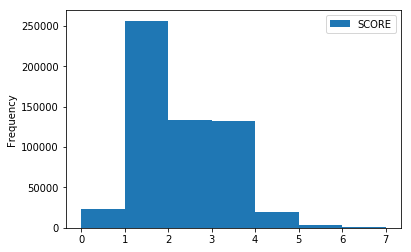

In [52]:
import matplotlib.pyplot as plt
entity_presence_score_df.iloc[:,1:].plot.hist(by='SCORE',bins=7)
# entity_presence_score_df.plot.hist(by='SCORE',bins = max(entity_presence_score_df['SCORE']), alpha=0.5)

In [55]:
entity_presence_score_df.iloc[:,1:].groupby('SCORE').count()

,LINK
SCORE,
0.0,23513
1.0,256418
2.0,134091
3.0,132703
4.0,19723
5.0,2978
6.0,406
7.0,17


making a list of all column names to consider, 
score and choose the ones with all the entitites,

add new table entries to the entity extractor

also add the negative example marking in to the dataset,
also leave neutral unmarked and entitites marked,

look into sentence tokenization as well


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a7ea19470>,
      dtype=object)

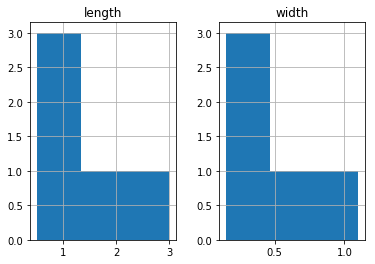

In [47]:
df = pd.DataFrame({
...     'length': [1.5, 0.5, 1.2, 0.9, 3],
...     'width': [0.7, 0.2, 0.15, 0.2, 1.1]
...     }, index= ['pig', 'rabbit', 'duck', 'chicken', 'horse'])
>>> hist = df.hist(bins=3)
hist